In [1]:
# !unzip mmwave-data.zip

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import special as sp
from scipy.stats import gaussian_kde
from scipy.io import loadmat
from sklearn.neighbors import KernelDensity
from scipy import special as sp
import warnings
warnings.filterwarnings('ignore')

# Data Load

## Small Scale Fading Data 

In [3]:
def SSF_mmdata_dB(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def SSF_mmdata_linear(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9


######################
#### LOAD PATH AB ####
######################
SSF_pathAB_dB = pd.DataFrame()
SSF_pathAB_dB['AP1'], SSF_pathAB_dB['AP2'], SSF_pathAB_dB['AP3'],\
 SSF_pathAB_dB['AP4'], SSF_pathAB_dB['AP5'], SSF_pathAB_dB['AP6'],\
  SSF_pathAB_dB['AP7'], SSF_pathAB_dB['AP8'], SSF_pathAB_dB['AP9'] = SSF_mmdata_dB('AB')

SSF_pathAB_linear = pd.DataFrame()
SSF_pathAB_linear['AP1'], SSF_pathAB_linear['AP2'], SSF_pathAB_linear['AP3'],\
 SSF_pathAB_linear['AP4'], SSF_pathAB_linear['AP5'], SSF_pathAB_linear['AP6'],\
  SSF_pathAB_linear['AP7'], SSF_pathAB_linear['AP8'], SSF_pathAB_linear['AP9'] = SSF_mmdata_linear('AB')


######################
#### LOAD PATH BA ####
######################
SSF_pathBA_dB = pd.DataFrame()
SSF_pathBA_dB['AP1'], SSF_pathBA_dB['AP2'], SSF_pathBA_dB['AP3'],\
 SSF_pathBA_dB['AP4'], SSF_pathBA_dB['AP5'], SSF_pathBA_dB['AP6'],\
  SSF_pathBA_dB['AP7'], SSF_pathBA_dB['AP8'], SSF_pathBA_dB['AP9'] = SSF_mmdata_dB('BA')

SSF_pathBA_linear = pd.DataFrame()
SSF_pathBA_linear['AP1'], SSF_pathBA_linear['AP2'], SSF_pathBA_linear['AP3'],\
 SSF_pathBA_linear['AP4'], SSF_pathBA_linear['AP5'], SSF_pathBA_linear['AP6'],\
  SSF_pathBA_linear['AP7'], SSF_pathBA_linear['AP8'], SSF_pathBA_linear['AP9'] = SSF_mmdata_linear('BA')

##########################
#### PRINT STATISTICS ####
##########################
print('Path AB (dB) Statistics:')
display(SSF_pathAB_dB.describe())
print('Path AB (linear) Statistics:')
display(SSF_pathAB_linear.describe())
print('Path BA (dB) Statistics:')
display(SSF_pathBA_dB.describe())
print('Path BA (linear) Statistics:')
display(SSF_pathBA_linear.describe())


Path AB (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,-0.696300,-0.706977,-0.950157,-0.649444,-0.671172,-1.023778,-0.975409,-0.890574,-1.067207
std,3.827021,3.843941,4.345763,3.608783,3.657521,4.609185,4.428430,4.217900,4.628232
min,-28.257000,-26.160000,-30.613000,-26.990000,-29.916000,-29.998000,-27.744000,-24.949000,-26.882000
25%,-2.003200,-2.086100,-2.829525,-1.817875,-1.925500,-3.061450,-3.032250,-2.724975,-3.256600
50%,0.017756,-0.086271,-0.148310,-0.047697,-0.012861,-0.149310,-0.141100,-0.180765,-0.253520
75%,1.553000,1.488500,1.844975,1.316550,1.431450,1.974400,1.982550,1.821300,2.012050
max,8.209900,9.598300,9.200100,10.698000,9.334600,8.803300,9.140200,9.140100,9.516400


Path AB (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,0.998078,0.999170,0.994459,0.996652,0.996119,0.998034,0.996456,0.996790,0.996149
std,0.346952,0.361394,0.406651,0.340052,0.342458,0.428794,0.417400,0.402380,0.439500
min,0.038648,0.049204,0.029467,0.044717,0.031928,0.031630,0.041001,0.056568,0.045280
25%,0.794040,0.786490,0.721980,0.811160,0.801170,0.702955,0.705320,0.730723,0.687333
50%,1.002000,0.990120,0.983070,0.994525,0.998520,0.982960,0.983890,0.979400,0.971230
75%,1.195800,1.186900,1.236625,1.163675,1.179200,1.255200,1.256400,1.233275,1.260675
max,2.573300,3.019400,2.884100,3.426900,2.929100,2.755300,2.864200,2.864200,2.991000


Path BA (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,-1.141164,-1.154185,-1.201912,-1.197784,-1.120310,-1.244764,-1.132814,-1.108337,-1.219527
std,4.811502,4.821488,4.949272,4.950949,4.758712,5.050291,4.790806,4.782434,5.034982
min,-27.320000,-27.572000,-29.529000,-28.736000,-30.499000,-31.529000,-26.868000,-28.713000,-29.627000
25%,-3.625500,-3.761550,-3.749250,-3.664900,-3.414300,-3.908400,-3.468750,-3.467175,-3.835200
50%,-0.280440,-0.366350,-0.327530,-0.265050,-0.282530,-0.364120,-0.316615,-0.214105,-0.305010
75%,2.210025,2.240700,2.276500,2.249450,2.210200,2.357300,2.133950,2.137500,2.370900
max,10.524000,10.389000,10.315000,9.950700,9.385600,9.530000,10.148000,9.653300,10.109000


Path BA (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,0.997566,0.998390,0.998292,0.996041,0.994971,0.997650,0.996580,0.998705,0.999811
std,0.457868,0.468088,0.473801,0.460772,0.442697,0.477986,0.454135,0.453083,0.476423
min,0.043050,0.041821,0.033383,0.036578,0.029857,0.026520,0.045353,0.036673,0.033011
25%,0.658760,0.648515,0.649440,0.655775,0.674970,0.637650,0.670752,0.670878,0.643050
50%,0.968230,0.958700,0.962990,0.969950,0.968000,0.958950,0.964205,0.975650,0.965490
75%,1.289700,1.294300,1.299650,1.295600,1.289800,1.311800,1.278500,1.279025,1.313800
max,3.358700,3.307100,3.279200,3.144400,2.946300,2.995700,3.216800,3.038600,3.202300


## Composite (Small + Large) Scale Fading Data

In [4]:
def composite_mmdata_dB(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def composite_mmdata_linear(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

######################
#### LOAD PATH AB ####
######################
composite_pathAB_dB = pd.DataFrame()
composite_pathAB_dB['AP1'], composite_pathAB_dB['AP2'], composite_pathAB_dB['AP3'],\
 composite_pathAB_dB['AP4'], composite_pathAB_dB['AP5'], composite_pathAB_dB['AP6'],\
  composite_pathAB_dB['AP7'], composite_pathAB_dB['AP8'], composite_pathAB_dB['AP9'] = composite_mmdata_dB('AB')

composite_pathAB_linear = pd.DataFrame()
composite_pathAB_linear['AP1'], composite_pathAB_linear['AP2'], composite_pathAB_linear['AP3'],\
 composite_pathAB_linear['AP4'], composite_pathAB_linear['AP5'], composite_pathAB_linear['AP6'],\
  composite_pathAB_linear['AP7'], composite_pathAB_linear['AP8'], composite_pathAB_linear['AP9'] = composite_mmdata_linear('AB')


######################
#### LOAD PATH BA ####
######################
composite_pathBA_dB = pd.DataFrame()
composite_pathBA_dB['AP1'], composite_pathBA_dB['AP2'], composite_pathBA_dB['AP3'],\
 composite_pathBA_dB['AP4'], composite_pathBA_dB['AP5'], composite_pathBA_dB['AP6'],\
  composite_pathBA_dB['AP7'], composite_pathBA_dB['AP8'], composite_pathBA_dB['AP9'] = composite_mmdata_dB('BA')

composite_pathBA_linear = pd.DataFrame()
composite_pathBA_linear['AP1'], composite_pathBA_linear['AP2'], composite_pathBA_linear['AP3'],\
 composite_pathBA_linear['AP4'], composite_pathBA_linear['AP5'], composite_pathBA_linear['AP6'],\
  composite_pathBA_linear['AP7'], composite_pathBA_linear['AP8'], composite_pathBA_linear['AP9'] = composite_mmdata_linear('BA')

##########################
#### PRINT STATISTICS ####
##########################
print('Path AB (dB) Statistics:')
display(composite_pathAB_dB.describe())
print('Path AB (linear) Statistics:')
display(composite_pathAB_linear.describe())
print('Path BA (dB) Statistics:')
display(composite_pathBA_dB.describe())
print('Path BA (linear) Statistics:')
display(composite_pathBA_linear.describe())


Path AB (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,-1.331243,-2.026816,-2.148211,-1.354591,-1.358023,-1.965932,-1.867219,-2.455355,-2.377686
std,5.555703,5.295770,5.622319,5.555328,5.270987,6.592554,5.370040,4.979277,5.386154
min,-34.977000,-35.591000,-37.205000,-33.143000,-34.196000,-36.296000,-32.348000,-32.857000,-32.103000
25%,-4.141100,-4.725900,-5.285100,-4.408050,-4.099150,-5.727400,-4.738550,-4.891600,-5.360025
50%,-0.597460,-1.021800,-1.318900,-0.049510,-0.654870,-1.528100,-0.982990,-1.590450,-1.507750
75%,2.620200,1.610700,1.786325,2.748350,1.862300,2.231150,1.945700,0.924527,1.539700
max,12.562000,9.626500,10.084000,9.553500,11.060000,13.356000,11.339000,9.054900,8.569400


Path AB (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,1.016877,0.921460,0.932225,1.008525,1.005849,1.035511,0.946677,0.863832,0.893894
std,0.547200,0.453448,0.513528,0.503199,0.564291,0.775473,0.486083,0.408087,0.462476
min,0.017830,0.016613,0.013796,0.022022,0.019507,0.015317,0.024133,0.022760,0.024821
25%,0.620790,0.580370,0.544185,0.602000,0.623795,0.517165,0.579525,0.569400,0.539513
50%,0.933530,0.889020,0.859125,0.994320,0.927380,0.838670,0.893000,0.832675,0.840645
75%,1.352150,1.203700,1.228300,1.372175,1.239150,1.292900,1.251050,1.112300,1.193975
max,4.247100,3.029200,3.193200,3.003800,3.572700,4.653600,3.689400,2.836300,2.682100


Path BA (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,-1.478477,-1.796911,-1.697986,-1.304056,-1.382989,-1.228730,-1.269627,-1.546466,-1.263962
std,5.612589,5.461735,5.331014,5.664596,5.709885,5.531827,5.590528,6.177197,5.595894
min,-29.275000,-30.195000,-29.306000,-31.022000,-35.014000,-30.264000,-29.162000,-32.034000,-29.974000
25%,-4.688175,-4.909150,-4.600750,-4.491600,-4.574200,-4.335100,-4.386750,-5.096475,-4.449900
50%,-0.726485,-1.062800,-0.846180,-0.413770,-0.738970,-0.424370,-0.462455,-0.927085,-0.411740
75%,2.475750,2.116600,2.084900,2.743400,2.576700,2.746100,2.654150,2.612550,2.782800
max,13.313000,12.184000,11.274000,13.101000,11.902000,10.764000,12.810000,14.148000,13.559000


Path BA (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,1.010464,0.963914,0.964883,1.029932,1.026995,1.030575,1.030587,1.047470,1.031002
std,0.577506,0.527819,0.503657,0.570421,0.595472,0.556338,0.572540,0.705591,0.566503
min,0.034377,0.030919,0.034252,0.028112,0.017754,0.030675,0.034824,0.025021,0.031717
25%,0.582895,0.568255,0.588795,0.596235,0.590590,0.607080,0.603480,0.556130,0.599110
50%,0.919760,0.884830,0.907180,0.953480,0.918440,0.952320,0.948150,0.898760,0.953700
75%,1.329775,1.275950,1.271300,1.371450,1.345300,1.371800,1.357425,1.350900,1.377700
max,4.630500,4.066500,3.661900,4.518900,3.936400,3.453000,4.370200,5.098000,4.763800


# Auxiliary Methods

In [5]:
def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print("Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
    else:
        print("Toc: start time not set") 

def KappaMuPDF(r, kappa, mu, omega):
  '''
  kappa-mu pdf.
  '''
  A = (2*mu * ((1 + kappa)**((mu+1)/2))) \
          /(np.sqrt(omega) * (kappa**((mu-1)/2)) * np.exp(mu * kappa))
  B = (r / np.sqrt(omega))**(mu)
  C = np.exp(-mu*(1+kappa) * (r/np.sqrt(omega))**2)
  D = sp.iv(mu-1, 2*mu * np.sqrt(kappa * (1+kappa)) * (r/np.sqrt(omega)))

  pdf = A * B * C * D
  return pdf

def AlphaMuPDF(r, alpha, mu, r_hat):
  '''
  alpha-mu pdf.
  '''
  A = (alpha * (mu**mu) * (r**((alpha * mu)-1))) / (sp.gamma(mu) * (r_hat**(alpha * mu)))
  B = np.exp( - mu * ((r**alpha) / (r_hat**alpha)))

  pdf = A * B 
  return pdf

def kldiv(pVec1, pVec2):
  '''
  Kullback-Leibler divergence.
  '''
  KL = np.sum(pVec1*(np.log2(pVec1)-np.log2(pVec2)))
  return KL

def RAD(kldiv1, kldiv2):
  '''
  Resistor-Average Distance.
  '''
  RAD = 1/(1/kldiv1+1/kldiv2)
  return RAD

def getDensityEstimationSamples(linear_data, nExtractedSamples, path, nAP):
  '''
  Extracted KDE uniformly spaced samples from the data.
  '''
  Xdata = np.linspace(linear_data.min(), linear_data.max(), nExtractedSamples).reshape(-1, 1)
  kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(linear_data.values.reshape(-1, 1))
  
  logkde = kde.score_samples(Xdata)
  Ydata = np.exp(logkde).reshape(-1,1)
  plt.figure(figsize=(10,7))
  plt.scatter(20*np.log10(Xdata), Ydata, c='magenta')
  plt.title(f'Path {path} | RX: {nAP}')
  plt.ylabel('Density')
  plt.xlabel('Small Scale Fading (dB)')
  plt.grid()
  plt.show()
  return Xdata, Ydata

def printSummary(path, nAP, fitnessType):
  print('='*30+'\n'+'Genetic Algorithm Fitting\nFitness Type: {}\nPath: {}\nRX: {}\n'.format(fitnessType, path, nAP))

def computeAIC(data, n, K, mle_ku, mle_au, ga_ku_mse, ga_ku_rad, ga_au_mse, ga_au_rad):
    # AIC MLE - KAPPA MU
    sum = np.sum(np.log(KappaMuPDF(data, mle_ku[0], mle_ku[1], mle_ku[2]).astype(float)))
    AIC_mle_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

    # AIC MLE - ALPHA MU
    sum = np.sum(np.log(AlphaMuPDF(data, mle_au[0], mle_au[1], mle_au[2]).astype(float)))
    AIC_mle_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

    # AIC GENETIC ALGORITHM KAPPA MU - FITNESS: MSE
    sum = np.sum(np.log(KappaMuPDF(data, ga_ku_mse[0], ga_ku_mse[1], ga_ku_mse[2])))
    AIC_ga_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

    # AIC GENETIC ALGORITHM KAPPA MU - FITNESS: RAD
    sum = np.sum(np.log(KappaMuPDF(data, ga_ku_rad[0], ga_ku_rad[1], ga_ku_rad[2])))
    AIC_ga_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

    # AIC GENETIC ALGORITHM ALPHA MU - FITNESS: MSE
    sum = np.sum(np.log(AlphaMuPDF(data, ga_au_mse[0], ga_au_mse[1], ga_au_mse[2])))
    AIC_ga_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

    # AIC GENETIC ALGORITHM ALPHA MU - FITNESS: RAD
    sum = np.sum(np.log(AlphaMuPDF(data, ga_au_rad[0], ga_au_rad[1], ga_au_rad[2])))
    AIC_ga_alpha_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

    rads = {'Methods':['MLE - KappaMu', 'MLE - AlphaMu', \
                       'GA - KappaMu (Fitness = MSE)', 'GA - KappaMu (Fitness = RAD)',\
                       'GA - AlphaMu (Fitness = MSE)', 'GA - AlphaMu (Fitness = RAD)'],
        'Akaike Information Criteria':[AIC_mle_kappa_mu, AIC_mle_alpha_mu, AIC_ga_kappa_mu, AIC_ga_kappa_mu_rad, AIC_ga_alpha_mu , AIC_ga_alpha_mu_rad]}

    df = pd.DataFrame(rads)
    display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))
    return df

def plotResults(Xdata, Ydata, ku_pdf, au_pdf, ga_ku_mse, ga_ku_rad, ga_au_mse, ga_au_rad, path, nAP):
    plt.figure(figsize=((10,7)))
    plt.scatter(20*np.log10(Xdata), Ydata, c='black')
    plt.plot(20*np.log10(Xdata), ku_pdf, label=r'$\kappa$-$\mu$ MLE')
    plt.plot(20*np.log10(Xdata), au_pdf, label=r'$\alpha$-$\mu$ MLE')
    plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ga_ku_mse[0], ga_ku_mse[1], ga_ku_mse[2]), label=r'GA: $\kappa$-$\mu$ (MSE)')
    plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ga_ku_rad[0], ga_ku_rad[1], ga_ku_rad[2]), label=r'GA: $\kappa$-$\mu$ (RAD)')
    plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, ga_au_mse[0], ga_au_mse[1], ga_au_mse[2]), label=r'GA: $\alpha$-$\mu$ (MSE)')
    plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, ga_au_rad[0], ga_au_rad[1], ga_au_rad[2]), label=r'GA: $\alpha$-$\mu$ (RAD)')
    plt.title(f'Path {path} | RX: {nAP}')
    plt.legend()
    plt.grid(True)
    plt.xlabel(r'Small Scale Fading (dB)')
    plt.ylabel('Density')
    plt.savefig('ku-au_path{}_ap{}.pdf'.format(path, nAP), dpi=150)
    plt.show()
    
    plt.figure(figsize=((10,7)))
    plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
    plt.plot(20*np.log10(Xdata), 20*np.log10(ku_pdf), label=r'$\kappa$-$\mu$ MLE')
    plt.plot(20*np.log10(Xdata), 20*np.log10(au_pdf), label=r'$\alpha$-$\mu$ MLE')
    plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ga_ku_mse[0], ga_ku_mse[1], ga_ku_mse[2])), label=r'GA: $\kappa$-$\mu$ (MSE)')
    plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ga_ku_rad[0], ga_ku_rad[1], ga_ku_rad[2])), label=r'GA: $\kappa$-$\mu$ (RAD)')
    plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, ga_au_mse[0], ga_au_mse[1], ga_au_mse[2])), label=r'GA: $\alpha$-$\mu$ (MSE)')
    plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, ga_au_rad[0], ga_au_rad[1], ga_au_rad[2])), label=r'GA: $\alpha$-$\mu$ (RAD)')
    plt.title(f'Path {path} | RX: {nAP}')
    plt.legend()
    plt.grid(True)
    plt.xlabel(r'Small Scale Fading (dB)')
    plt.ylabel('Log Density')
    plt.savefig('ku-au_path{}_ap{} - log.pdf'.format(path, nAP), dpi=150)
    plt.show()

In [6]:
def fitness_au(X, Y, fitnessType, alpha, mu, r_hat):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  (Alpha Mu)
  '''
  if fitnessType == 'MSE':
    y_pred = AlphaMuPDF(X, alpha, mu, r_hat)
    n = len(Y)
    cost = 1/n * np.sum(val**2 for val in (Y-y_pred))
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = AlphaMuPDF(X, alpha, mu, r_hat)/np.sum(AlphaMuPDF(X, alpha, mu, r_hat))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost


def geneticAlgorithm_au(X, Y, threshold, firstFlag=True):
  '''
  Genetic Algorithm incorporating Alpha Mu in the Fitness Function
  It fits alpha, mu, r_hat
  '''
  if firstFlag:
        tic()
  solutions = []
  bestParams = []
  bestCriteria = 0
  bestGen = 0


  # Generate solutions (chromossomes)
  for s in range(nPopulation):
    solutions.append((random.uniform(0.01, 10), # alpha
                        random.uniform(0.01, 5), # mu
                        random.uniform(0.01, 2))) # r_hat

  # Evolutionary Loop
  for i in range(nMaxGen):
    rankedSolutions = []
    for s in solutions:
      # if s[3] > 110: # Forcing Ms parameter to not get too high (avoiding overflow)
      #   s = list(s)
      #   s[3] = 105
      #   s = tuple(s)
      rankedSolutions.append( (fitness_au(X, Y, fitnessType, s[0],s[1],s[2]), s) )
    rankedSolutions.sort()
    rankedSolutions.reverse()
    
    # print(f'=== Generation: {i} === ')
    # print(f'Fitness: {rankedSolutions[0][0]}')
    # print('Best individual:')
    # print(f'Kappa: {rankedSolutions[0][1][0]}')
    # print(f'Mu: {rankedSolutions[0][1][1]}')
    # print(f'Omega: {rankedSolutions[0][1][2]}')
    # print(f'Ms {rankedSolutions[0][1][3]}\n')

    # Keeping track the best params and generation:
    if rankedSolutions[0][0] > bestCriteria:
      bestCriteria = rankedSolutions[0][0]
      bestGen = i
      bestParams = rankedSolutions[0][1]
    
    # Check if it is good enough according to a satisfactory threshold:
    if bestCriteria > threshold:
      print('Satisfactory Threshold reached!')  
      toc()
      print('\nBest Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
      print('Kappa: {}\nMu: {}\nR_hat: {}'.format(bestParams[0],bestParams[1],bestParams[2]))
      return bestParams[0],bestParams[1],bestParams[2]

    # Combine the best solutions and make a new solution of those combined solutions
    bestSolutions = rankedSolutions[:100]
    elements_alpha = []
    elements_mu = []
    elements_r_hat = [] 

    for s in bestSolutions:
      elements_alpha.append(s[1][0])
      elements_mu.append(s[1][1])
      elements_r_hat.append(s[1][2])


    newGen = []
    for _ in range(nPopulation):
      e1 = random.choice(elements_alpha) * random.uniform(0.975,1.025) # Mutation of 5%
      e2 = random.choice(elements_mu) * random.uniform(0.975,1.025) # Mutation of 5%
      e3 = random.choice(elements_r_hat) * random.uniform(0.975,1.025) # Mutation of 5%
      
      newGen.append((e1,e2,e3))

    solutions = newGen
    
    if i == nMaxGen-1:
      print('Max number of generations reached! (Possible bad initialization)\nRestarting...\n')
      b0, b1, b2 = geneticAlgorithm_au(X, Y, threshold, False)
    
      return b0, b1, b2

In [7]:
def fitness_ku(X, Y, fitnessType, kappa, mu, omega):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  (Kappa Mu)
  '''
  if fitnessType == 'MSE':
    y_pred = KappaMuPDF(X, kappa, mu, omega).astype(float)
    n = len(Y)
    sum = []
    for val in (Y-y_pred):
      sum.append(val**2)
    sum = np.sum(sum)
    cost = 1/n * sum
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = KappaMuPDF(X, kappa, mu, omega).astype(float)/np.sum(KappaMuPDF(X, kappa, mu, omega).astype(float))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost


def geneticAlgorithm_ku(X, Y, threshold, firstFlag=True):
  '''
  Genetic Algorithm incorporating Kappa Mu in the Fitness Function
  It fits kappa, mu, omega
  '''
  if firstFlag:
        tic()
  solutions = []
  bestParams = []
  bestCriteria = 0
  bestGen = 0


  # Generate solutions (chromossomes)
  for s in range(nPopulation):
    solutions.append((random.uniform(0.1, 70), # kappa
                        random.uniform(0.01, 1.5), # mu
                        random.uniform(0.01, 2)))  # omega = r_hat^2
              
  # Evolutionary Loop
  for i in range(nMaxGen):
    rankedSolutions = []	
    for s in solutions:
      # if s[0] > 90: # Forcing Ms parameter to not get too high (avoiding overflow)
      #   s = list(s)
      #   s[0] = 90
      #   s = tuple(s)
      rankedSolutions.append( (fitness_ku(X, Y, fitnessType, s[0],s[1],s[2]), s) )
    rankedSolutions.sort()
    rankedSolutions.reverse()
    
    # print(f'=== Generation: {i} === ')
    # print(f'Fitness: {rankedSolutions[0][0]}')
    # print('Best individual:')
    # print(f'Kappa: {rankedSolutions[0][1][0]}')
    # print(f'Mu: {rankedSolutions[0][1][1]}')
    # print(f'Omega: {rankedSolutions[0][1][2]}\n')

    # Keeping track the best params and generation:
    if rankedSolutions[0][0] > bestCriteria:
      bestCriteria = rankedSolutions[0][0]
      bestGen = i
      bestParams = rankedSolutions[0][1]

    # Check if it is good enough according to a satisfactory threshold:
    if bestCriteria > threshold:
      print('Satisfactory Threshold reached!')  
      toc()
      print('\nBest Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
      print('Kappa: {}\nMu: {}\nOmega: {}'.format(bestParams[0],bestParams[1],bestParams[2]))
      return bestParams[0],bestParams[1],bestParams[2]
    
    # Combine the best solutions and make a new solution of those combined solutions
    bestSolutions = rankedSolutions[:100]
    elements_kappa = []
    elements_mu = []
    elements_omega = [] 

    for s in bestSolutions:
      elements_kappa.append(s[1][0])
      elements_mu.append(s[1][1])
      elements_omega.append(s[1][2])


    newGen = []
    for _ in range(nPopulation):
      e1 = random.choice(elements_kappa) * random.uniform(0.975,1.025) # Mutation of 5%
      e2 = random.choice(elements_mu) * random.uniform(0.975,1.025) # Mutation of 5%
      e3 = random.choice(elements_omega) * random.uniform(0.975,1.025) # Mutation of 5%

      
      newGen.append((e1,e2,e3))

    solutions = newGen
    
    if i == nMaxGen-1:
      print('Max number of generations reached! (Possible bad initialization)\nRestarting...\n')
      b0, b1, b2 = geneticAlgorithm_ku(X, Y, threshold, False)
    
      return b0, b1, b2

# Small Scale Fading Fitting (PARAMETERS)

In [8]:
### PARAMETERS
nMaxGen = 200
nPopulation = 1000
nExtractedSamples = 81

## $\alpha$-$\mu$ and $\kappa$-$\mu$ - Path: AB



In [9]:
path = 'AB'

### AP 1

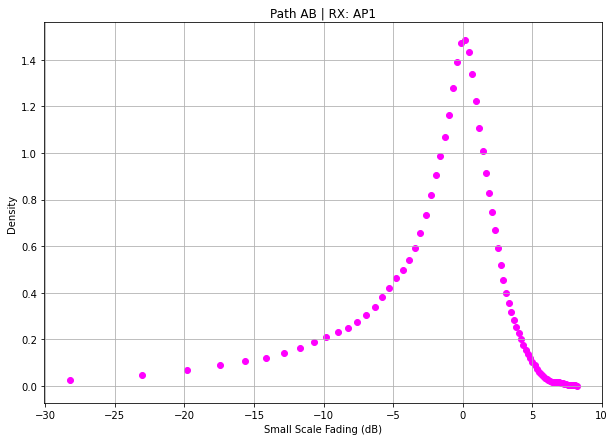

In [10]:
nAP = 'AP1'
estParameters_pathAB_ap1 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [11]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 167.6)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 75)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 138.5)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 38.4)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP1

Satisfactory Threshold reached!
Elapsed time is 1.8373422622680664 seconds.

Best Fitness: 168.311219514419
Best Gen: 5
Kappa: 22.327174110105215
Mu: 0.25799712831578636
Omega: 1.091223381425109
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP1

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 54.42735719680786 seconds.

Best Fitness: 75.2309638964401
Best Gen: 10
Kappa: 7.171738152126305
Mu: 0.5511355829089292
Omega: 1.115899633644897
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP1

Satisfactory Threshold reached!
Elapsed time is 23.264782190322876 seconds.

Best Fitness: [138.53025539]
Best Gen: 110
Kappa: 3.5735940965360204
Mu: 1.0709312532021
R_hat: 1.0991571996971632
Genetic Algo

#### Estimated Parameters

In [12]:
mle_ku_pathAB_ap1 = [70, 0.084599, 1.0912] # KappaMu MLE
mle_au_pathAB_ap1 = [3.7795, 0.98044, 1.101] # AlphaMu MLE

estParameters_pathAB_ap1['MLE - KappaMu'] = mle_ku_pathAB_ap1
estParameters_pathAB_ap1['MLE - AlphaMu'] = mle_au_pathAB_ap1
estParameters_pathAB_ap1['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathAB_ap1['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathAB_ap1['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathAB_ap1['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathAB_ap1 = estParameters_pathAB_ap1.set_index(index)
estParameters_pathAB_ap1

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,70.000000,3.77950,22.327174,7.171738,3.573594,3.252325
mu,0.084599,0.98044,0.257997,0.551136,1.070931,1.045117
omega/r_hat,1.091200,1.10100,1.091223,1.115900,1.099157,1.143676


#### Plots

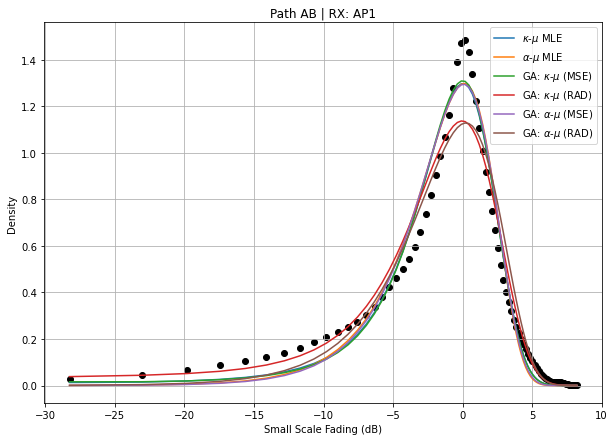

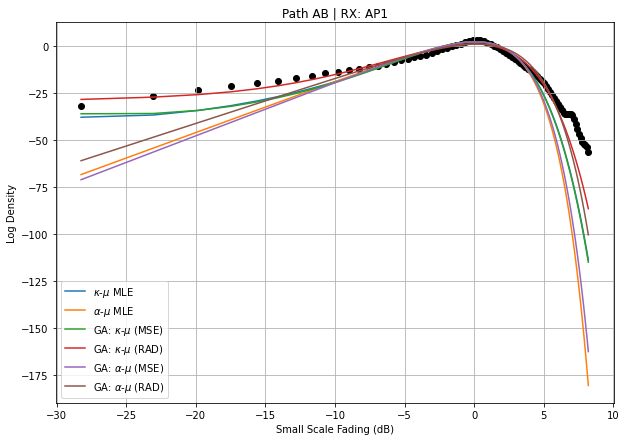

In [13]:
ku_AB_ap1_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap1[0], mle_ku_pathAB_ap1[1], mle_ku_pathAB_ap1[2]).astype(float)
au_AB_ap1_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap1[0], mle_au_pathAB_ap1[1], mle_au_pathAB_ap1[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_AB_ap1_pdf,\
     au_AB_ap1_pdf,\
     estParameters_pathAB_ap1['GA: KappaMu - MSE'],\
     estParameters_pathAB_ap1['GA: KappaMu - RAD'],\
     estParameters_pathAB_ap1['GA: AlphaMu - MSE'],\
     estParameters_pathAB_ap1['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [14]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap1 = computeAIC(data, n, K,\
                            mle_ku_pathAB_ap1,\
                            mle_au_pathAB_ap1,\
                            estParameters_pathAB_ap1['GA: KappaMu - MSE'],\
                            estParameters_pathAB_ap1['GA: KappaMu - RAD'],\
                            estParameters_pathAB_ap1['GA: AlphaMu - MSE'],\
                            estParameters_pathAB_ap1['GA: AlphaMu - RAD'])

Path: AB
RX: AP1


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),15334.498547
1,MLE - KappaMu,16148.949489
2,GA - AlphaMu (Fitness = RAD),16149.879532
3,GA - KappaMu (Fitness = MSE),16197.410845
4,GA - AlphaMu (Fitness = MSE),17594.460792
5,MLE - AlphaMu,17848.315733


### AP 2

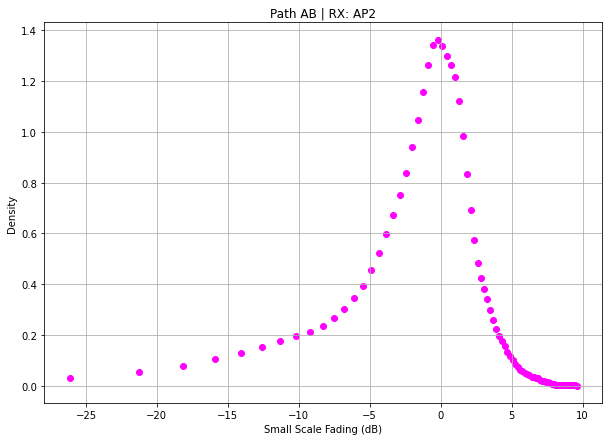

In [15]:
nAP = 'AP2'
estParameters_pathAB_ap2 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [16]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 263.6)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 50.2)


print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 205.6)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 36.6)


============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP2

Satisfactory Threshold reached!
Elapsed time is 0.7742066383361816 seconds.

Best Fitness: 264.84310336233284
Best Gen: 2
Kappa: 62.53056385029253
Mu: 0.09361823516639663
Omega: 1.0717584007784684
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP2

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 61.411972761154175 seconds.

Best Fitness: 50.214943507204495
Best Gen: 15
Kappa: 5.170414834388392
Mu: 0.6898884553553091
Omega: 1.1148877782094369
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP2

Satisfactory Threshold reached!
Elapsed time is 29.35478901863098 seconds.

Best Fitness: [205.60876779]
Best Gen: 143
Kappa: 3.5519270044495532
Mu: 1.05386923544925
R_hat: 1.0864422503059878
Geneti

#### Estimated Parameters

In [17]:
mle_ku_pathAB_ap2 = [70, 0.081811, 1.0624] # KappaMu MLE
mle_au_pathAB_ap2 = [3.6024, 1.0318, 1.086] # AlphaMu MLE

estParameters_pathAB_ap2['MLE - KappaMu'] = mle_ku_pathAB_ap2
estParameters_pathAB_ap2['MLE - AlphaMu'] = mle_au_pathAB_ap2
estParameters_pathAB_ap2['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathAB_ap2['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathAB_ap2['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathAB_ap2['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathAB_ap2 = estParameters_pathAB_ap2.set_index(index)
estParameters_pathAB_ap2

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,70.000000,3.6024,62.530564,5.170415,3.551927,2.343278
mu,0.081811,1.0318,0.093618,0.689888,1.053869,1.596213
omega/r_hat,1.062400,1.0860,1.071758,1.114888,1.086442,1.089149


#### Plots

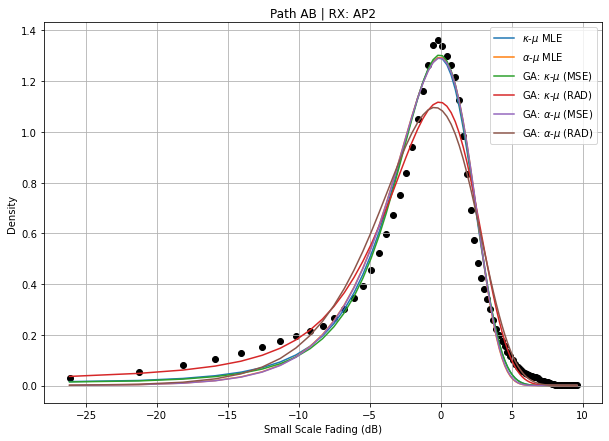

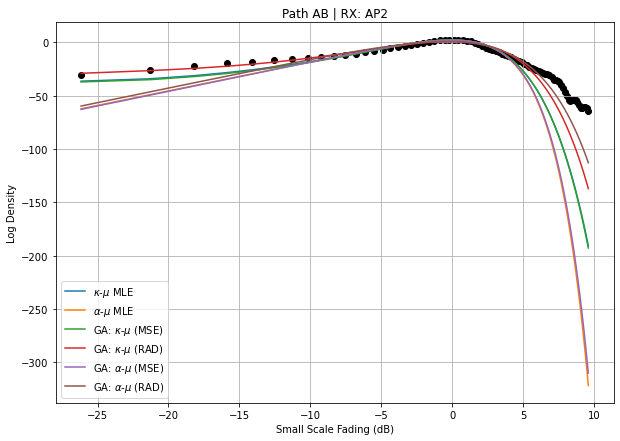

In [18]:
ku_AB_ap2_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap2[0], mle_ku_pathAB_ap2[1], mle_ku_pathAB_ap2[2]).astype(float)
au_AB_ap2_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap2[0], mle_au_pathAB_ap2[1], mle_au_pathAB_ap2[2]).astype(float)


plotResults(Xdata,\
     Ydata,\
     ku_AB_ap2_pdf,\
     au_AB_ap2_pdf,\
     estParameters_pathAB_ap2['GA: KappaMu - MSE'],\
     estParameters_pathAB_ap2['GA: KappaMu - RAD'],\
     estParameters_pathAB_ap2['GA: AlphaMu - MSE'],\
     estParameters_pathAB_ap2['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [19]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap2 = computeAIC(data, n, K,\
                            mle_ku_pathAB_ap2,\
                            mle_au_pathAB_ap2,\
                            estParameters_pathAB_ap2['GA: KappaMu - MSE'],\
                            estParameters_pathAB_ap2['GA: KappaMu - RAD'],\
                            estParameters_pathAB_ap2['GA: AlphaMu - MSE'],\
                            estParameters_pathAB_ap2['GA: AlphaMu - RAD'])

Path: AB
RX: AP2


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),14030.387268
1,GA - AlphaMu (Fitness = RAD),14330.236530
2,MLE - KappaMu,15258.903614
3,GA - KappaMu (Fitness = MSE),15332.437135
4,GA - AlphaMu (Fitness = MSE),17102.768814
5,MLE - AlphaMu,17261.580975


### AP 3

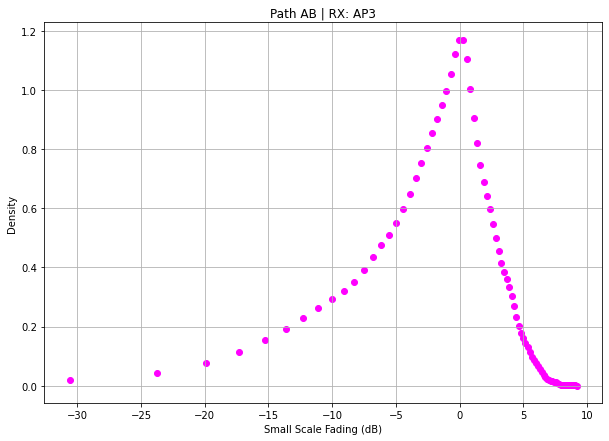

In [20]:
nAP = 'AP3'
estParameters_pathAB_ap3 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [21]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 387.2)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 163.5)


print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 291.3)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 84.4)


============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP3

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 100.64291596412659 seconds.

Best Fitness: 387.332648750256
Best Gen: 37
Kappa: 3.3195294191494367
Mu: 0.7893034848379697
Omega: 1.0994446861080742
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP3

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 136.23376870155334 seconds.

Best Fitness: 164.26983210226857
Best Gen: 13
Kappa: 1.1478185010402222
Mu: 1.1824696055119985
Omega: 1.1631041819732553
===========

#### Estimated Parameters

In [22]:
mle_ku_pathAB_ap3 = [3.9358, 0.70033, 1.0958] # KappaMu MLE
mle_au_pathAB_ap3 = [2.9752, 0.92743, 1.114] # AlphaMu MLE

estParameters_pathAB_ap3['MLE - KappaMu'] = mle_ku_pathAB_ap3
estParameters_pathAB_ap3['MLE - AlphaMu'] = mle_au_pathAB_ap3
estParameters_pathAB_ap3['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathAB_ap3['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathAB_ap3['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathAB_ap3['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathAB_ap3 = estParameters_pathAB_ap3.set_index(index)
estParameters_pathAB_ap3

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,3.93580,2.97520,3.319529,1.147819,2.954258,2.546450
mu,0.70033,0.92743,0.789303,1.182470,0.939119,1.016948
omega/r_hat,1.09580,1.11400,1.099445,1.163104,1.113360,1.077471


#### Plots

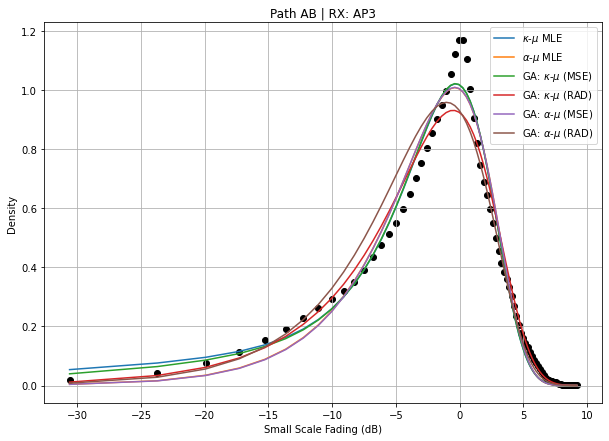

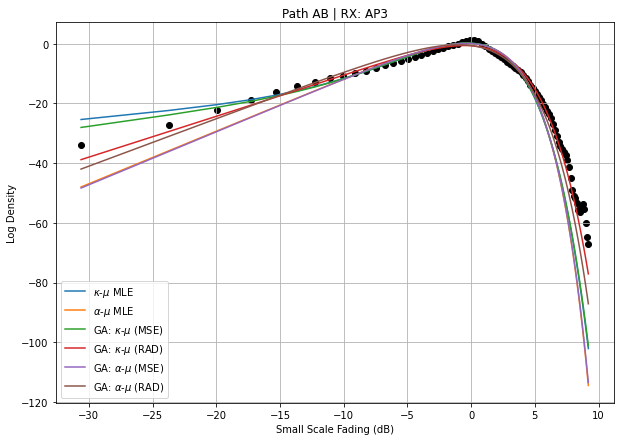

In [23]:
ku_AB_ap3_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap3[0], mle_ku_pathAB_ap3[1], mle_ku_pathAB_ap3[2]).astype(float)
au_AB_ap3_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap3[0], mle_au_pathAB_ap3[1], mle_au_pathAB_ap3[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_AB_ap3_pdf,\
     au_AB_ap3_pdf,\
     estParameters_pathAB_ap3['GA: KappaMu - MSE'],\
     estParameters_pathAB_ap3['GA: KappaMu - RAD'],\
     estParameters_pathAB_ap3['GA: AlphaMu - MSE'],\
     estParameters_pathAB_ap3['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [24]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap3 = computeAIC(data, n, K,\
                            mle_ku_pathAB_ap3,\
                            mle_au_pathAB_ap3,\
                            estParameters_pathAB_ap3['GA: KappaMu - MSE'],\
                            estParameters_pathAB_ap3['GA: KappaMu - RAD'],\
                            estParameters_pathAB_ap3['GA: AlphaMu - MSE'],\
                            estParameters_pathAB_ap3['GA: AlphaMu - RAD'])

Path: AB
RX: AP3


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),21610.478752
1,GA - AlphaMu (Fitness = RAD),21838.598505
2,GA - KappaMu (Fitness = MSE),21896.492670
3,MLE - KappaMu,21949.749742
4,GA - AlphaMu (Fitness = MSE),22076.498318
5,MLE - AlphaMu,22082.124659


### AP 4

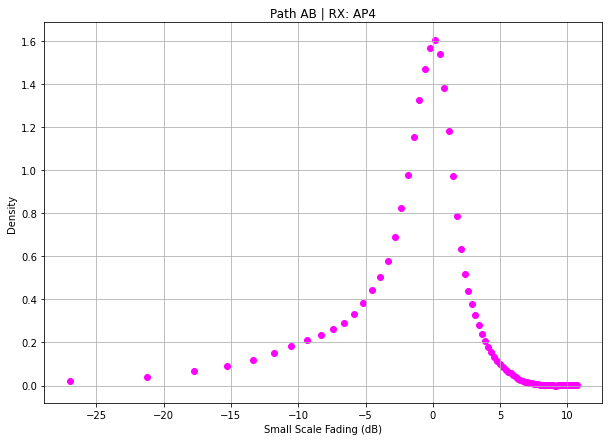

In [25]:
nAP = 'AP4'
estParameters_pathAB_ap4 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [26]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 138.4)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 34)


print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 121)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 23.2)


============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP4

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 329.28391098976135 seconds.

Best Fitness: 138.41938189595984
Best Gen: 5
Kappa: 42.27703283722956
Mu: 0.16856582143762025
Omega: 1.0513720257727968
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP4

Max number of generations reached! (Possible bad

#### Estimated Parameters

In [27]:
mle_ku_pathAB_ap4 = [70, 0.1023, 1.0499] # KappaMu MLE
mle_au_pathAB_ap4 = [3.896, 1.1092, 1.0701] # AlphaMu MLE

estParameters_pathAB_ap4['MLE - KappaMu'] = mle_ku_pathAB_ap4
estParameters_pathAB_ap4['MLE - AlphaMu'] = mle_au_pathAB_ap4
estParameters_pathAB_ap4['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathAB_ap4['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathAB_ap4['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathAB_ap4['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathAB_ap4 = estParameters_pathAB_ap4.set_index(index)
estParameters_pathAB_ap4

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,70.0000,3.8960,42.277033,5.514949,3.695482,2.386451
mu,0.1023,1.1092,0.168566,0.718926,1.213359,1.676696
omega/r_hat,1.0499,1.0701,1.051372,1.094869,1.068064,1.056474


#### Plots

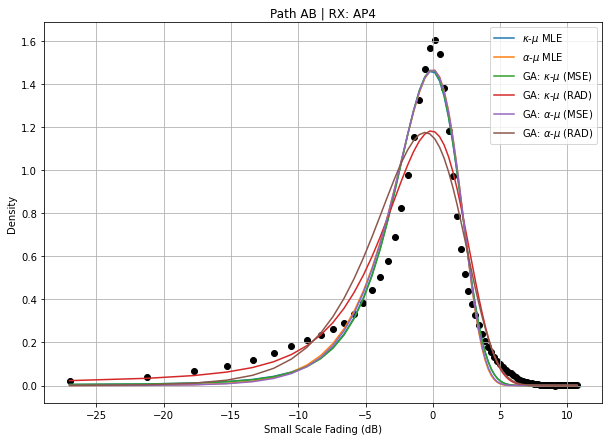

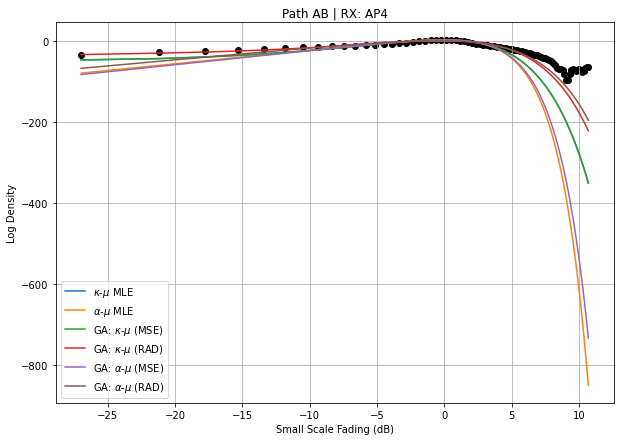

In [28]:
ku_AB_ap4_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap4[0], mle_ku_pathAB_ap4[1], mle_ku_pathAB_ap4[2]).astype(float)
au_AB_ap4_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap4[0], mle_au_pathAB_ap4[1], mle_au_pathAB_ap4[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_AB_ap4_pdf,\
     au_AB_ap4_pdf,\
     estParameters_pathAB_ap4['GA: KappaMu - MSE'],\
     estParameters_pathAB_ap4['GA: KappaMu - RAD'],\
     estParameters_pathAB_ap4['GA: AlphaMu - MSE'],\
     estParameters_pathAB_ap4['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [29]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap4 = computeAIC(data, n, K,\
                            mle_ku_pathAB_ap4,\
                            mle_au_pathAB_ap4,\
                            estParameters_pathAB_ap4['GA: KappaMu - MSE'],\
                            estParameters_pathAB_ap4['GA: KappaMu - RAD'],\
                            estParameters_pathAB_ap4['GA: AlphaMu - MSE'],\
                            estParameters_pathAB_ap4['GA: AlphaMu - RAD'])

Path: AB
RX: AP4


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),13435.897208
1,GA - AlphaMu (Fitness = RAD),13889.551879
2,MLE - KappaMu,15783.636475
3,GA - KappaMu (Fitness = MSE),15856.095335
4,GA - AlphaMu (Fitness = MSE),19071.076278
5,MLE - AlphaMu,19687.131702


### AP 5

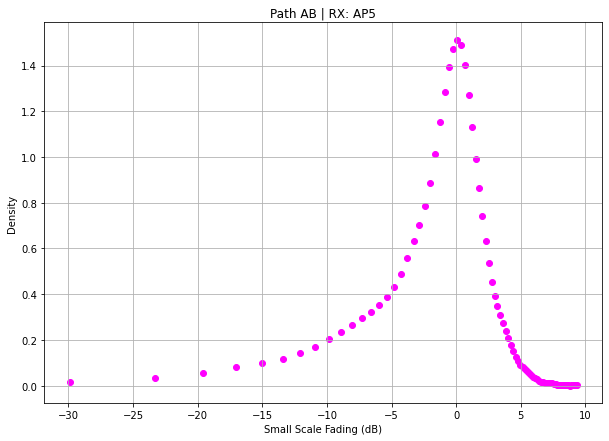

In [30]:
nAP = 'AP5'
estParameters_pathAB_ap5 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [31]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 166.7)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 51)


print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 142.5)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 18.4)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP5

Satisfactory Threshold reached!
Elapsed time is 0.7075552940368652 seconds.

Best Fitness: 167.13684918527028
Best Gen: 2
Kappa: 40.57143547279089
Mu: 0.15473140789049125
Omega: 1.0717037610596591
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP5

Satisfactory Threshold reached!
Elapsed time is 6.204416036605835 seconds.

Best Fitness: 51.01159197409581
Best Gen: 27
Kappa: 4.7927851019255865
Mu: 0.7793630869896655
Omega: 1.0987009505817362
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP5

Satisfactory Threshold reached!
Elapsed time is 0.5727062225341797 seconds.

Best Fitness: [142.58899833]
Best Gen: 2
Kappa: 4.1433332826479
Mu: 0.9112072294120994
R_hat: 1.0909127080598782
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP5

Satisfactory Threshold reac

#### Estimated Parameters

In [32]:
mle_ku_pathAB_ap5 = [70, 0.091737, 1.0713] # KappaMu MLE
mle_au_pathAB_ap5 = [4.0603, 0.93926, 1.0889] # AlphaMu MLE

estParameters_pathAB_ap5['MLE - KappaMu'] = mle_ku_pathAB_ap5
estParameters_pathAB_ap5['MLE - AlphaMu'] = mle_au_pathAB_ap5
estParameters_pathAB_ap5['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathAB_ap5['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathAB_ap5['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathAB_ap5['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathAB_ap5 = estParameters_pathAB_ap5.set_index(index)
estParameters_pathAB_ap5

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,70.000000,4.06030,40.571435,4.792785,4.143333,3.608412
mu,0.091737,0.93926,0.154731,0.779363,0.911207,0.748308
omega/r_hat,1.071300,1.08890,1.071704,1.098701,1.090913,1.060692


#### Plots

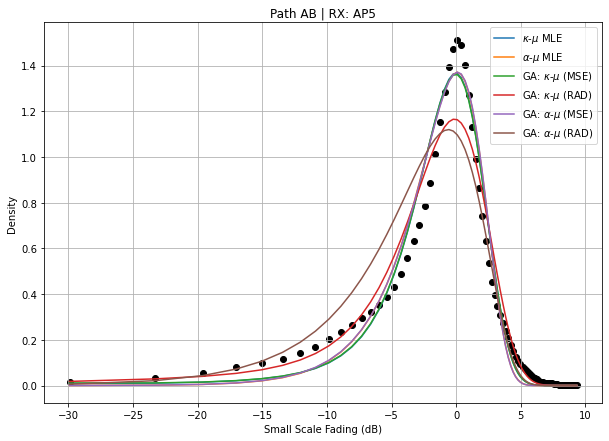

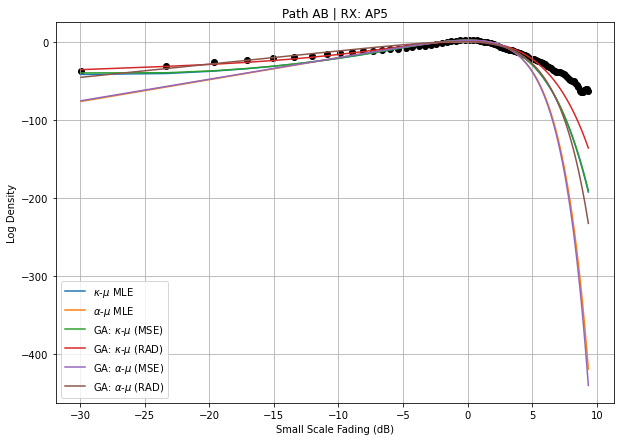

In [33]:
ku_AB_ap5_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap5[0], mle_ku_pathAB_ap5[1], mle_ku_pathAB_ap5[2]).astype(float)
au_AB_ap5_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap5[0], mle_au_pathAB_ap5[1], mle_au_pathAB_ap5[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_AB_ap5_pdf,\
     au_AB_ap5_pdf,\
     estParameters_pathAB_ap5['GA: KappaMu - MSE'],\
     estParameters_pathAB_ap5['GA: KappaMu - RAD'],\
     estParameters_pathAB_ap5['GA: AlphaMu - MSE'],\
     estParameters_pathAB_ap5['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [34]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap5 = computeAIC(data, n, K,\
                            mle_ku_pathAB_ap5,\
                            mle_au_pathAB_ap5,\
                            estParameters_pathAB_ap5['GA: KappaMu - MSE'],\
                            estParameters_pathAB_ap5['GA: KappaMu - RAD'],\
                            estParameters_pathAB_ap5['GA: AlphaMu - MSE'],\
                            estParameters_pathAB_ap5['GA: AlphaMu - RAD'])

Path: AB
RX: AP5


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),12967.259900
1,GA - KappaMu (Fitness = MSE),14093.780631
2,MLE - KappaMu,14161.015393
3,GA - AlphaMu (Fitness = RAD),14662.767892
4,MLE - AlphaMu,16989.950902
5,GA - AlphaMu (Fitness = MSE),17185.375690


### AP 6

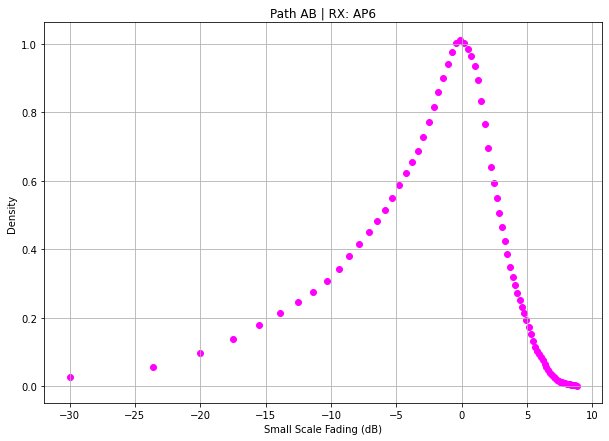

In [35]:
nAP = 'AP6'
estParameters_pathAB_ap6 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [36]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 776)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 276)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 505.8)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 130.5)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP6

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 59.31862020492554 seconds.

Best Fitness: 776.0948226385352
Best Gen: 57
Kappa: 2.975245268366793
Mu: 0.755958264708011
Omega: 1.1297166110661214
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP6

Satisfactory Threshold reached!
Elapsed time is 20.8905131816864 seconds.

Best Fitness: 276.2249735231849
Best Gen: 98
Kappa: 1.5285469359420716
Mu: 0.9950306530859391
Omega: 1.1800953958359668
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP6

Satisfactory Threshold reached!
Elapsed time is 15.17976450920105 seconds.

Best Fitness: [505.82177688]
Best Gen: 78
Kappa: 3.1557975051199816
Mu: 0.7580122469670704
R_hat: 1.1400096058640083
Genetic Al

#### Estimated Parameters

In [37]:
mle_ku_pathAB_ap6 = [2.9856, 0.75482, 1.1294] # KappaMu MLE
mle_au_pathAB_ap6 = [3.1744, 0.75118, 1.141] # AlphaMu MLE

estParameters_pathAB_ap6['MLE - KappaMu'] = mle_ku_pathAB_ap6
estParameters_pathAB_ap6['MLE - AlphaMu'] = mle_au_pathAB_ap6
estParameters_pathAB_ap6['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathAB_ap6['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathAB_ap6['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathAB_ap6['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathAB_ap6 = estParameters_pathAB_ap6.set_index(index)
estParameters_pathAB_ap6

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,2.98560,3.17440,2.975245,1.528547,3.155798,2.363910
mu,0.75482,0.75118,0.755958,0.995031,0.758012,1.045750
omega/r_hat,1.12940,1.14100,1.129717,1.180095,1.140010,1.132654


#### Plots

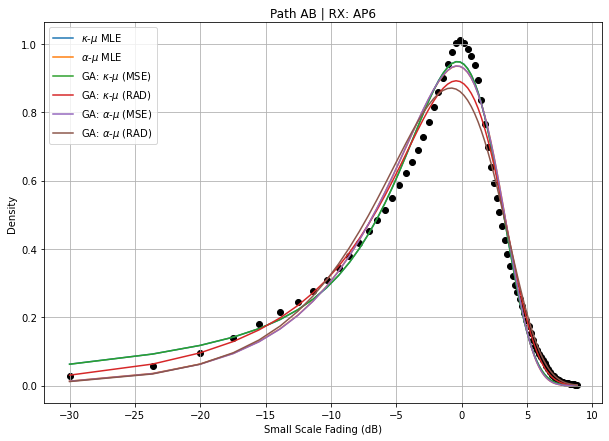

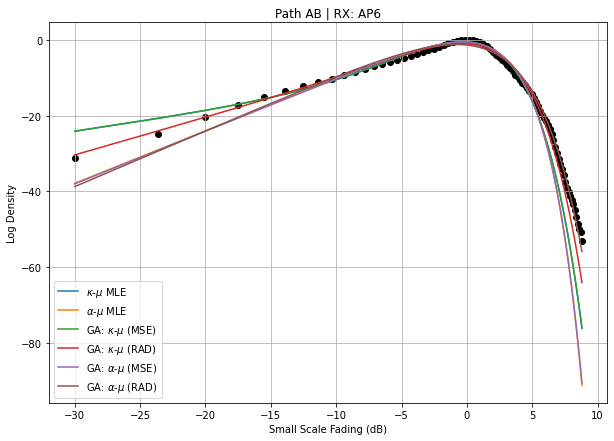

In [38]:
ku_AB_ap6_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap6[0], mle_ku_pathAB_ap6[1], mle_ku_pathAB_ap6[2]).astype(float)
au_AB_ap6_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap6[0], mle_au_pathAB_ap6[1], mle_au_pathAB_ap6[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_AB_ap6_pdf,\
     au_AB_ap6_pdf,\
     estParameters_pathAB_ap6['GA: KappaMu - MSE'],\
     estParameters_pathAB_ap6['GA: KappaMu - RAD'],\
     estParameters_pathAB_ap6['GA: AlphaMu - MSE'],\
     estParameters_pathAB_ap6['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [39]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap6 = computeAIC(data, n, K,\
                            mle_ku_pathAB_ap6,\
                            mle_au_pathAB_ap6,\
                            estParameters_pathAB_ap6['GA: KappaMu - MSE'],\
                            estParameters_pathAB_ap6['GA: KappaMu - RAD'],\
                            estParameters_pathAB_ap6['GA: AlphaMu - MSE'],\
                            estParameters_pathAB_ap6['GA: AlphaMu - RAD'])

Path: AB
RX: AP6


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),19205.815085
1,GA - AlphaMu (Fitness = RAD),19294.189166
2,GA - KappaMu (Fitness = MSE),19405.946156
3,MLE - KappaMu,19408.443744
4,GA - AlphaMu (Fitness = MSE),19571.007440
5,MLE - AlphaMu,19578.516516


### AP 7

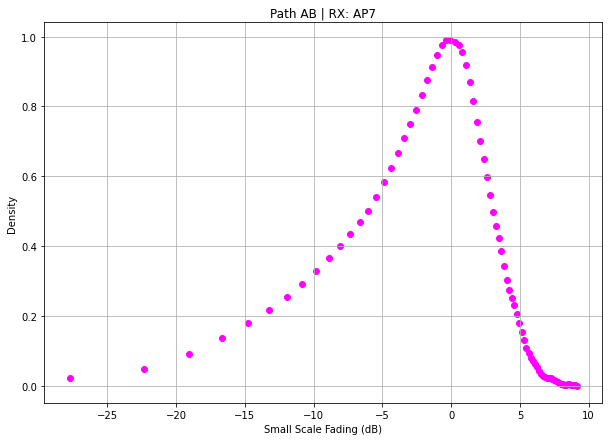

In [40]:
nAP = 'AP7'
estParameters_pathAB_ap7 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [41]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 1328)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 420)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 1002.6)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 250)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP7

Satisfactory Threshold reached!
Elapsed time is 1.4477763175964355 seconds.

Best Fitness: 1373.3438082804205
Best Gen: 5
Kappa: 55.13610546371199
Mu: 0.059970109499989946
Omega: 1.0885244721900789
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP7

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 100.72559809684753 seconds.

Best Fitness: 420.0126866221189
Best Gen: 81
Kappa: 1.495988898217157
Mu: 1.0529991694981586
Omega: 1.1669977676793832
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP7

Satisfactory Threshold reached!
Elapsed time is 15.405418157577515 seconds.

Best Fitness: [1002.65478556]
Best Gen: 7

#### Estimated Parameters

In [42]:
mle_ku_pathAB_ap7 = [2.7588, 0.80981, 1.1366] # KappaMu MLE
mle_au_pathAB_ap7 = [3.3109, 0.72071, 1.1448] # AlphaMu MLE

estParameters_pathAB_ap7['MLE - KappaMu'] = mle_ku_pathAB_ap7
estParameters_pathAB_ap7['MLE - AlphaMu'] = mle_au_pathAB_ap7
estParameters_pathAB_ap7['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathAB_ap7['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathAB_ap7['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathAB_ap7['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathAB_ap7 = estParameters_pathAB_ap7.set_index(index)
estParameters_pathAB_ap7

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,2.75880,3.31090,55.136105,1.495989,3.306211,2.927799
mu,0.80981,0.72071,0.059970,1.052999,0.723024,0.810341
omega/r_hat,1.13660,1.14480,1.088524,1.166998,1.144512,1.144642


#### Plots

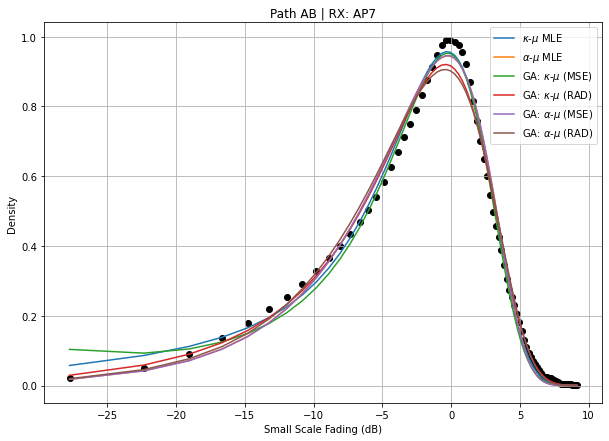

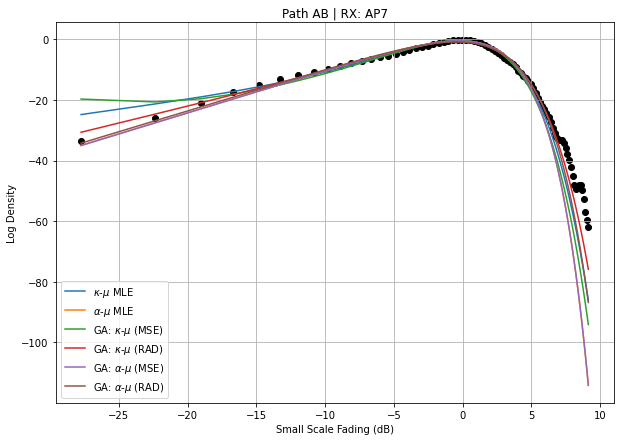

In [43]:
ku_AB_ap7_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap7[0], mle_ku_pathAB_ap7[1], mle_ku_pathAB_ap7[2]).astype(float)
au_AB_ap7_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap7[0], mle_au_pathAB_ap7[1], mle_au_pathAB_ap7[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_AB_ap7_pdf,\
     au_AB_ap7_pdf,\
     estParameters_pathAB_ap7['GA: KappaMu - MSE'],\
     estParameters_pathAB_ap7['GA: KappaMu - RAD'],\
     estParameters_pathAB_ap7['GA: AlphaMu - MSE'],\
     estParameters_pathAB_ap7['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [44]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap7 = computeAIC(data, n, K,\
                            mle_ku_pathAB_ap7,\
                            mle_au_pathAB_ap7,\
                            estParameters_pathAB_ap7['GA: KappaMu - MSE'],\
                            estParameters_pathAB_ap7['GA: KappaMu - RAD'],\
                            estParameters_pathAB_ap7['GA: AlphaMu - MSE'],\
                            estParameters_pathAB_ap7['GA: AlphaMu - RAD'])

Path: AB
RX: AP7


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),19799.124264
1,GA - AlphaMu (Fitness = RAD),19872.224148
2,MLE - KappaMu,19939.579846
3,MLE - AlphaMu,20149.937527
4,GA - AlphaMu (Fitness = MSE),20150.151998
5,GA - KappaMu (Fitness = MSE),21119.254314


### AP 8

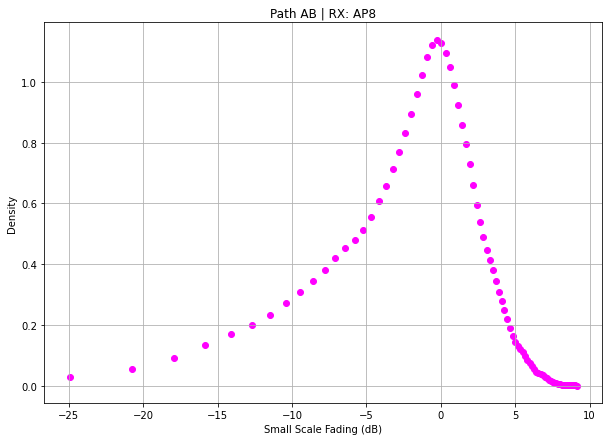

In [45]:
nAP = 'AP8'
estParameters_pathAB_ap8 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [46]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 504.8)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 160.7)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 349.4)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 123)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP8

Satisfactory Threshold reached!
Elapsed time is 1.6919453144073486 seconds.

Best Fitness: 516.4442586505739
Best Gen: 6
Kappa: 65.797858512375
Mu: 0.05712209896160035
Omega: 1.0624515768115685
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP8

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 87.18300580978394 seconds.

Best Fitness: 160.71586301574084
Best Gen: 18
Kappa: 1.5645343237861082
Mu: 1.0995121686398501
Omega: 1.153342891454351
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP8

Satisfactory Threshold reached!
Elapsed time is 19.104552507400513 seconds.

Best Fitness: [349.47183214]
Best Gen: 98
Kap

#### Estimated Parameters

In [47]:
mle_ku_pathAB_ap8 = [70, 0.054552, 1.0672] # KappaMu MLE
mle_au_pathAB_ap8 = [3.0939, 0.90552, 1.1124] # AlphaMu MLE

estParameters_pathAB_ap8['MLE - KappaMu'] = mle_ku_pathAB_ap8
estParameters_pathAB_ap8['MLE - AlphaMu'] = mle_au_pathAB_ap8
estParameters_pathAB_ap8['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathAB_ap8['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathAB_ap8['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathAB_ap8['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathAB_ap8 = estParameters_pathAB_ap8.set_index(index)
estParameters_pathAB_ap8

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,70.000000,3.09390,65.797859,1.564534,3.114438,2.375081
mu,0.054552,0.90552,0.057122,1.099512,0.894722,1.197066
omega/r_hat,1.067200,1.11240,1.062452,1.153343,1.113021,1.106156


#### Plots

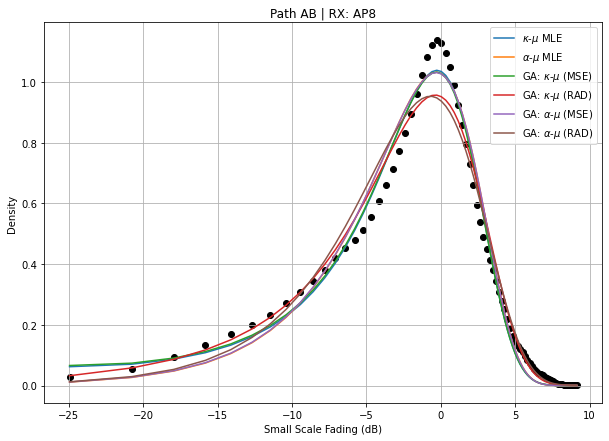

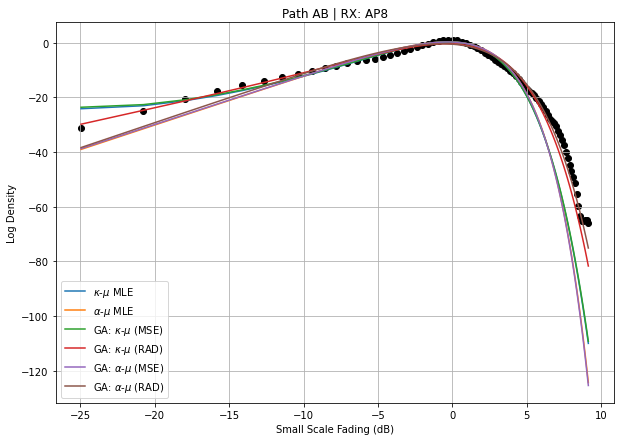

In [48]:
ku_AB_ap8_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap8[0], mle_ku_pathAB_ap8[1], mle_ku_pathAB_ap8[2]).astype(float)
au_AB_ap8_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap8[0], mle_au_pathAB_ap8[1], mle_au_pathAB_ap8[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_AB_ap8_pdf,\
     au_AB_ap8_pdf,\
     estParameters_pathAB_ap8['GA: KappaMu - MSE'],\
     estParameters_pathAB_ap8['GA: KappaMu - RAD'],\
     estParameters_pathAB_ap8['GA: AlphaMu - MSE'],\
     estParameters_pathAB_ap8['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [49]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap8 = computeAIC(data, n, K,\
                            mle_ku_pathAB_ap8,\
                            mle_au_pathAB_ap8,\
                            estParameters_pathAB_ap8['GA: KappaMu - MSE'],\
                            estParameters_pathAB_ap8['GA: KappaMu - RAD'],\
                            estParameters_pathAB_ap8['GA: AlphaMu - MSE'],\
                            estParameters_pathAB_ap8['GA: AlphaMu - RAD'])

Path: AB
RX: AP8


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),18405.009582
1,GA - AlphaMu (Fitness = RAD),18453.175706
2,MLE - AlphaMu,19010.430870
3,GA - AlphaMu (Fitness = MSE),19019.683340
4,MLE - KappaMu,19547.091216
5,GA - KappaMu (Fitness = MSE),19564.460211


### AP 9

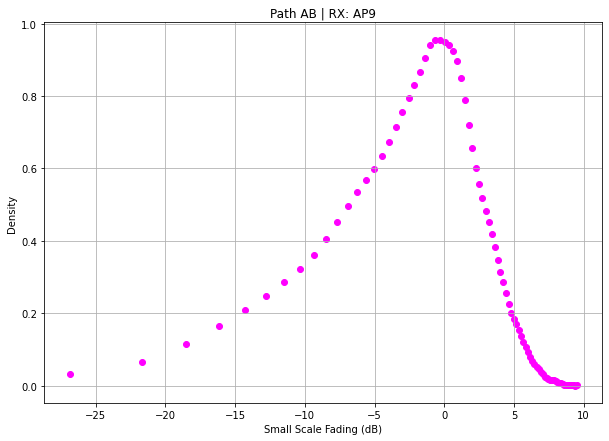

In [50]:
nAP = 'AP9'
estParameters_pathAB_ap9 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [51]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 1263.9)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 379.9)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 890.8)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 100)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP9

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 79.32070970535278 seconds.

Best Fitness: 1263.9092944094841
Best Gen: 144
Kappa: 1.92672287494872
Mu: 0.9069452183123591
Omega: 1.1311869456676884
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP9

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 204.50514793395996 seconds.

Best Fitness: 380.01155993883765
Best Gen: 119
Kappa: 0.9295193967454507
Mu: 1.1171575928463333
Omega: 1.1867232461859822
==========

#### Estimated Parameters

In [52]:
mle_ku_pathAB_ap9 = [1.9103, 0.90984, 1.1314] # KappaMu MLE
mle_au_pathAB_ap9 = [2.8416, 0.82981, 1.1307] # AlphaMu MLE

estParameters_pathAB_ap9['MLE - KappaMu'] = mle_ku_pathAB_ap9
estParameters_pathAB_ap9['MLE - AlphaMu'] = mle_au_pathAB_ap9
estParameters_pathAB_ap9['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathAB_ap9['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathAB_ap9['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathAB_ap9['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathAB_ap9 = estParameters_pathAB_ap9.set_index(index)
estParameters_pathAB_ap9

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,1.91030,2.84160,1.926723,0.929519,2.850446,2.044201
mu,0.90984,0.82981,0.906945,1.117158,0.826876,1.126905
omega/r_hat,1.13140,1.13070,1.131187,1.186723,1.130833,1.112947


#### Plots

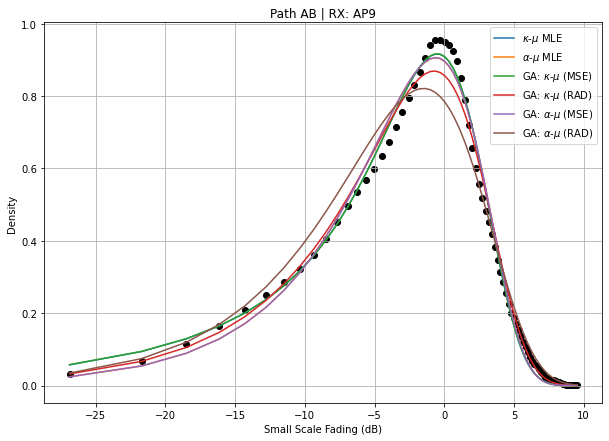

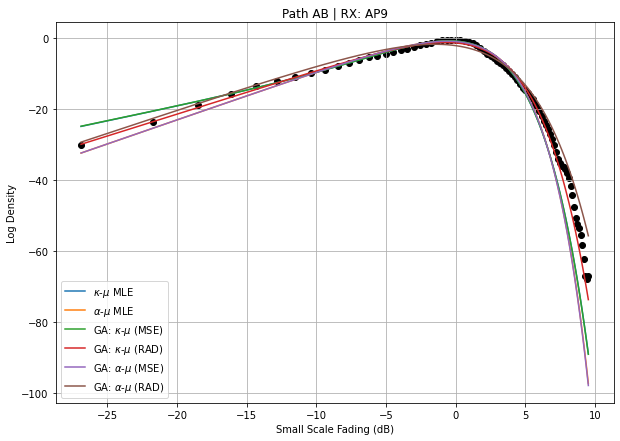

In [53]:
ku_AB_ap9_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap9[0], mle_ku_pathAB_ap9[1], mle_ku_pathAB_ap9[2]).astype(float)
au_AB_ap9_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap9[0], mle_au_pathAB_ap9[1], mle_au_pathAB_ap9[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_AB_ap9_pdf,\
     au_AB_ap9_pdf,\
     estParameters_pathAB_ap9['GA: KappaMu - MSE'],\
     estParameters_pathAB_ap9['GA: KappaMu - RAD'],\
     estParameters_pathAB_ap9['GA: AlphaMu - MSE'],\
     estParameters_pathAB_ap9['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [54]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap9 = computeAIC(data, n, K,\
                            mle_ku_pathAB_ap9,\
                            mle_au_pathAB_ap9,\
                            estParameters_pathAB_ap9['GA: KappaMu - MSE'],\
                            estParameters_pathAB_ap9['GA: KappaMu - RAD'],\
                            estParameters_pathAB_ap9['GA: AlphaMu - MSE'],\
                            estParameters_pathAB_ap9['GA: AlphaMu - RAD'])

,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),20946.276626
1,MLE - KappaMu,21146.497402
2,GA - KappaMu (Fitness = MSE),21150.426516
3,MLE - AlphaMu,21154.779206
4,GA - AlphaMu (Fitness = MSE),21162.626164
5,GA - AlphaMu (Fitness = RAD),21229.049268


## $\alpha$-$\mu$ and $\kappa$-$\mu$ - Path: BA



In [55]:
path = 'BA'

### AP 1

Path: AB
RX: AP9


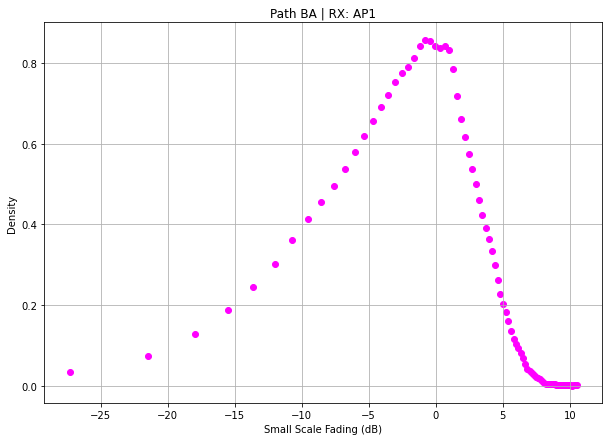

In [56]:
nAP = 'AP1'
estParameters_pathBA_ap1 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [57]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 4526)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 1397.5)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 3752)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 100)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP1

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 79.82456135749817 seconds.

Best Fitness: 4526.582583705336
Best Gen: 145
Kappa: 1.0773073792105174
Mu: 1.014253021168177
Omega: 1.1877439307133313
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP1

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 91.79017281532288 seconds.

Best Fitness: 1397.5933092694677
Best Gen: 34
Kappa: 0.7461389120670258
Mu: 1.094616629652413
Omega: 1.2067538536324187
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP1

Satisfactory Threshold reached!
Elapsed 

#### Estimated Parameters

In [58]:
mle_ku_pathBA_ap1 = [1.0728, 1.0154, 1.1878] # KappaMu MLE
mle_au_pathBA_ap1 = [2.7032, 0.79288, 1.1482] # AlphaMu MLE

estParameters_pathBA_ap1['MLE - KappaMu'] = mle_ku_pathBA_ap1
estParameters_pathBA_ap1['MLE - AlphaMu'] = mle_au_pathBA_ap1
estParameters_pathBA_ap1['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathBA_ap1['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathBA_ap1['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathBA_ap1['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathBA_ap1 = estParameters_pathBA_ap1.set_index(index)
estParameters_pathBA_ap1

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,1.0728,2.70320,1.077307,0.746139,2.709975,2.801758
mu,1.0154,0.79288,1.014253,1.094617,0.789703,0.598054
omega/r_hat,1.1878,1.14820,1.187744,1.206754,1.148441,1.208767


#### Plots

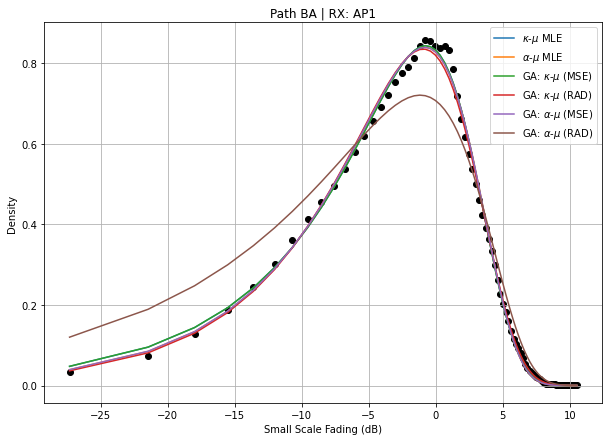

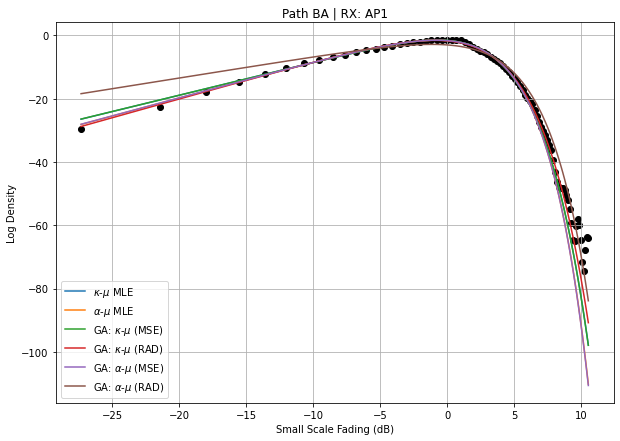

In [59]:
ku_BA_ap1_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap1[0], mle_ku_pathBA_ap1[1], mle_ku_pathBA_ap1[2]).astype(float)
au_BA_ap1_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap1[0], mle_au_pathBA_ap1[1], mle_au_pathBA_ap1[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_BA_ap1_pdf,\
     au_BA_ap1_pdf,\
     estParameters_pathBA_ap1['GA: KappaMu - MSE'],\
     estParameters_pathBA_ap1['GA: KappaMu - RAD'],\
     estParameters_pathBA_ap1['GA: AlphaMu - MSE'],\
     estParameters_pathBA_ap1['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [60]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap1 = computeAIC(data, n, K,\
                            mle_ku_pathBA_ap1,\
                            mle_au_pathBA_ap1,\
                            estParameters_pathBA_ap1['GA: KappaMu - MSE'],\
                            estParameters_pathBA_ap1['GA: KappaMu - RAD'],\
                            estParameters_pathBA_ap1['GA: AlphaMu - MSE'],\
                            estParameters_pathBA_ap1['GA: AlphaMu - RAD'])

Path: BA
RX: AP1


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),25385.358383
1,MLE - KappaMu,25425.449618
2,GA - KappaMu (Fitness = MSE),25426.201094
3,MLE - AlphaMu,25442.893688
4,GA - AlphaMu (Fitness = MSE),25445.214745
5,GA - AlphaMu (Fitness = RAD),26216.325592


### AP 2

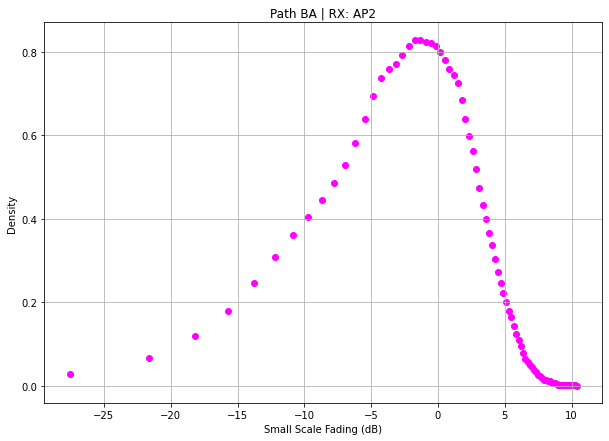

In [61]:
nAP = 'AP2'
estParameters_pathBA_ap2 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [62]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 12580)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 2502)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 12151)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 488)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP2

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 138.85117316246033 seconds.

Best Fitness: 12580.814953718238
Best Gen: 192
Kappa: 0.5887222556024052
Mu: 1.1174754380885232
Omega: 1.2012964510454205
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP2

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 71.84042048454285 seconds.

Best Fitness: 2502.5033658264956
Best Gen: 137
Kappa: 0.3560859164186278
Mu: 1.1603910173293173
Omega: 1.218014460191749
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP2

Max number of generations reached! (

#### Estimated Parameters

In [63]:
mle_ku_pathBA_ap2 = [0.5874, 1.1176, 1.2014] # KappaMu MLE
mle_au_pathBA_ap2 = [2.3342, 0.95683, 1.1278] # AlphaMu MLE

estParameters_pathBA_ap2['MLE - KappaMu'] = mle_ku_pathBA_ap2
estParameters_pathBA_ap2['MLE - AlphaMu'] = mle_au_pathBA_ap2
estParameters_pathBA_ap2['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathBA_ap2['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathBA_ap2['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathBA_ap2['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathBA_ap2 = estParameters_pathBA_ap2.set_index(index)
estParameters_pathBA_ap2

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,0.5874,2.33420,0.588722,0.356086,2.332698,2.141261
mu,1.1176,0.95683,1.117475,1.160391,0.957533,1.100491
omega/r_hat,1.2014,1.12780,1.201296,1.218014,1.127702,1.103324


#### Plots

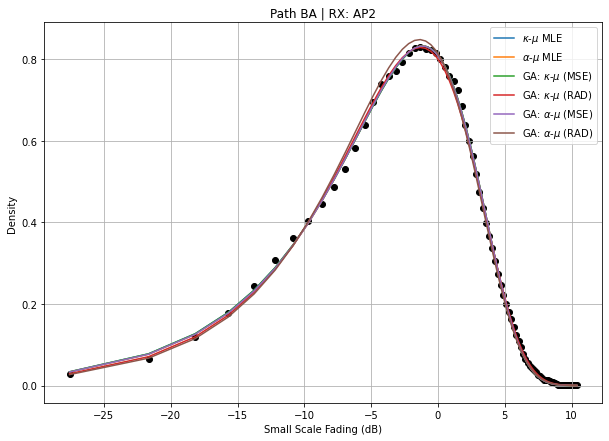

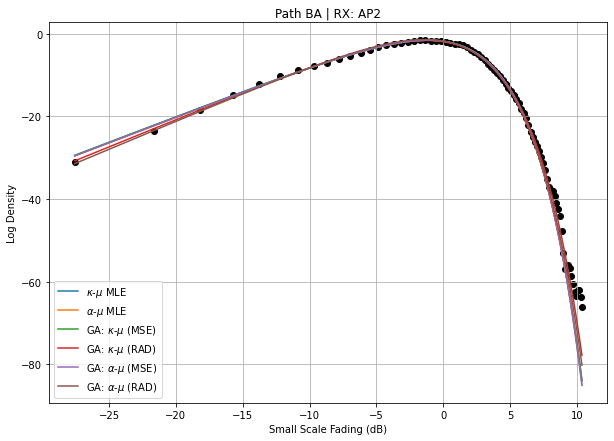

In [64]:
ku_BA_ap2_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap2[0], mle_ku_pathBA_ap2[1], mle_ku_pathBA_ap2[2]).astype(float)
au_BA_ap2_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap2[0], mle_au_pathBA_ap2[1], mle_au_pathBA_ap2[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_BA_ap2_pdf,\
     au_BA_ap2_pdf,\
     estParameters_pathBA_ap2['GA: KappaMu - MSE'],\
     estParameters_pathBA_ap2['GA: KappaMu - RAD'],\
     estParameters_pathBA_ap2['GA: AlphaMu - MSE'],\
     estParameters_pathBA_ap2['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [65]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap2 = computeAIC(data, n, K,\
                            mle_ku_pathBA_ap2,\
                            mle_au_pathBA_ap2,\
                            estParameters_pathBA_ap2['GA: KappaMu - MSE'],\
                            estParameters_pathBA_ap2['GA: KappaMu - RAD'],\
                            estParameters_pathBA_ap2['GA: AlphaMu - MSE'],\
                            estParameters_pathBA_ap2['GA: AlphaMu - RAD'])

Path: BA
RX: AP2


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),25403.143195
1,GA - AlphaMu (Fitness = RAD),25413.450700
2,GA - AlphaMu (Fitness = MSE),25427.111644
3,MLE - AlphaMu,25427.437296
4,MLE - KappaMu,25427.547122
5,GA - KappaMu (Fitness = MSE),25427.794845


### AP 3

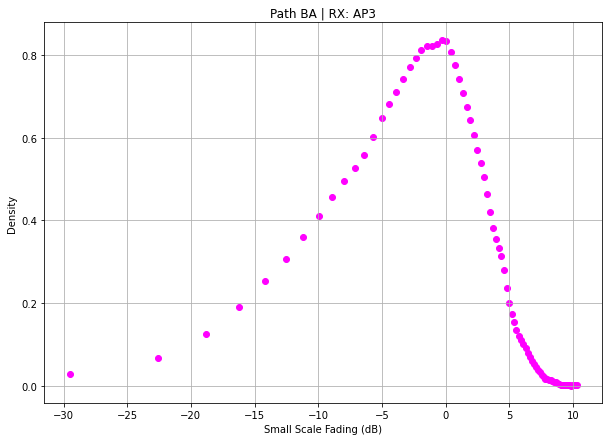

In [66]:
nAP = 'AP3'
estParameters_pathBA_ap3 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [67]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 7789)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 1203)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 6495)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 241)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP3

Satisfactory Threshold reached!
Elapsed time is 10.82209062576294 seconds.

Best Fitness: 7789.907682134097
Best Gen: 44
Kappa: 0.871188273349436
Mu: 1.0206536400437407
Omega: 1.1961977351168156
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP3

Satisfactory Threshold reached!
Elapsed time is 11.71322774887085 seconds.

Best Fitness: 1203.0378682909904
Best Gen: 53
Kappa: 0.5166513228717727
Mu: 1.0938517178649658
Omega: 1.2218370964183067
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP3

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 100.15420508384705 seconds.

Best Fitness: [6495.07750271]
Best Gen: 102

#### Estimated Parameters

In [68]:
mle_ku_pathBA_ap3 = [0.87074, 1.0208, 1.1965] # KappaMu MLE
mle_au_pathBA_ap3 = [2.5463, 0.82408, 1.1439] # AlphaMu MLE

estParameters_pathBA_ap3['MLE - KappaMu'] = mle_ku_pathBA_ap3
estParameters_pathBA_ap3['MLE - AlphaMu'] = mle_au_pathBA_ap3
estParameters_pathBA_ap3['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathBA_ap3['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathBA_ap3['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathBA_ap3['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathBA_ap3 = estParameters_pathBA_ap3.set_index(index)
estParameters_pathBA_ap3

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,0.87074,2.54630,0.871188,0.516651,2.545623,2.709143
mu,1.02080,0.82408,1.020654,1.093852,0.824774,0.690273
omega/r_hat,1.19650,1.14390,1.196198,1.221837,1.143759,1.168710


#### Plots

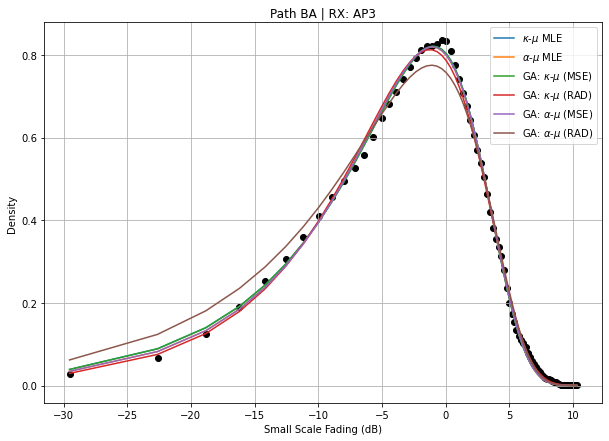

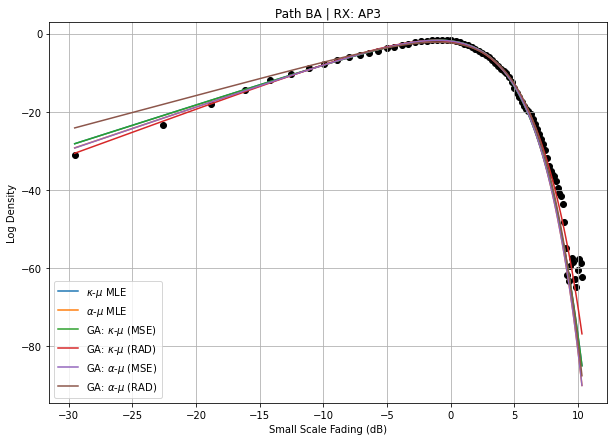

In [69]:
ku_BA_ap3_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap3[0], mle_ku_pathBA_ap3[1], mle_ku_pathBA_ap3[2]).astype(float)
au_BA_ap3_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap3[0], mle_au_pathBA_ap3[1], mle_au_pathBA_ap3[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_BA_ap3_pdf,\
     au_BA_ap3_pdf,\
     estParameters_pathBA_ap3['GA: KappaMu - MSE'],\
     estParameters_pathBA_ap3['GA: KappaMu - RAD'],\
     estParameters_pathBA_ap3['GA: AlphaMu - MSE'],\
     estParameters_pathBA_ap3['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [70]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap3 = computeAIC(data, n, K,\
                            mle_ku_pathBA_ap3,\
                            mle_au_pathBA_ap3,\
                            estParameters_pathBA_ap3['GA: KappaMu - MSE'],\
                            estParameters_pathBA_ap3['GA: KappaMu - RAD'],\
                            estParameters_pathBA_ap3['GA: AlphaMu - MSE'],\
                            estParameters_pathBA_ap3['GA: AlphaMu - RAD'])

Path: BA
RX: AP3


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),24780.132864
1,MLE - KappaMu,24833.717707
2,GA - KappaMu (Fitness = MSE),24834.094036
3,MLE - AlphaMu,24842.314912
4,GA - AlphaMu (Fitness = MSE),24842.418062
5,GA - AlphaMu (Fitness = RAD),24950.198508


### AP 4

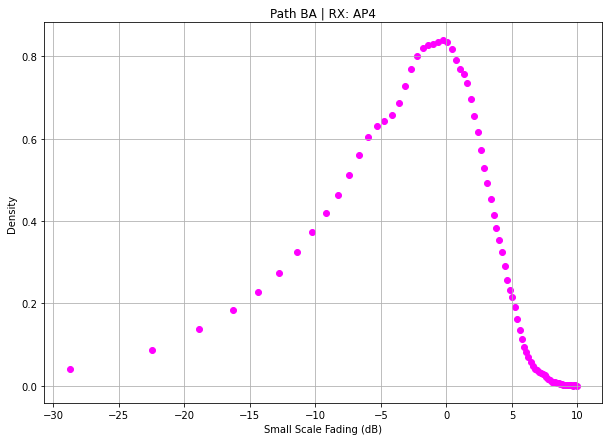

In [71]:
nAP = 'AP4'
estParameters_pathBA_ap4 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [72]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 9920)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 1525)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 7493)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 470)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP4

Satisfactory Threshold reached!
Elapsed time is 40.78190517425537 seconds.

Best Fitness: 9920.342185264435
Best Gen: 173
Kappa: 1.2059519026061452
Mu: 0.9647951656940372
Omega: 1.1944940952446876
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP4

Satisfactory Threshold reached!
Elapsed time is 10.474509477615356 seconds.

Best Fitness: 1525.2111404329094
Best Gen: 47
Kappa: 0.9691960652666368
Mu: 1.016945563209049
Omega: 1.2063095090477538
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP4

Satisfactory Threshold reached!
Elapsed time is 23.623293161392212 seconds.

Best Fitness: [7493.91823953]
Best Gen: 120
Kappa: 2.8751428251405344
Mu: 0.7147495806655276
R_hat: 1.1613174132669577
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP4

Max number of genera

#### Estimated Parameters

In [73]:
mle_ku_pathBA_ap4 = [1.2076, 0.96427, 1.1942] # KappaMu MLE
mle_au_pathBA_ap4 = [2.8763, 0.71398, 1.1614] # AlphaMu MLE

estParameters_pathBA_ap4['MLE - KappaMu'] = mle_ku_pathBA_ap4
estParameters_pathBA_ap4['MLE - AlphaMu'] = mle_au_pathBA_ap4
estParameters_pathBA_ap4['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathBA_ap4['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathBA_ap4['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathBA_ap4['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathBA_ap4 = estParameters_pathBA_ap4.set_index(index)
estParameters_pathBA_ap4

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,1.20760,2.87630,1.205952,0.969196,2.875143,2.378928
mu,0.96427,0.71398,0.964795,1.016946,0.714750,0.979988
omega/r_hat,1.19420,1.16140,1.194494,1.206310,1.161317,1.138147


#### Plots

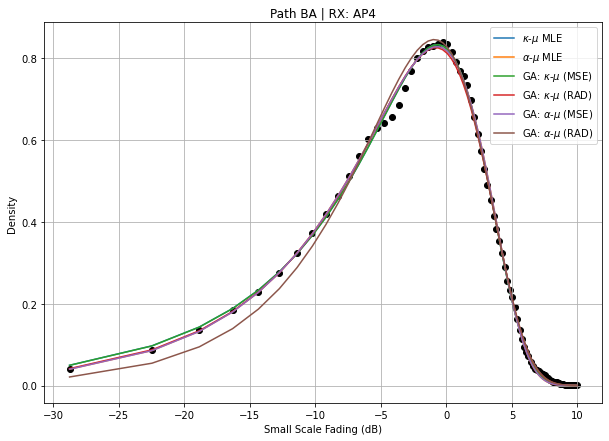

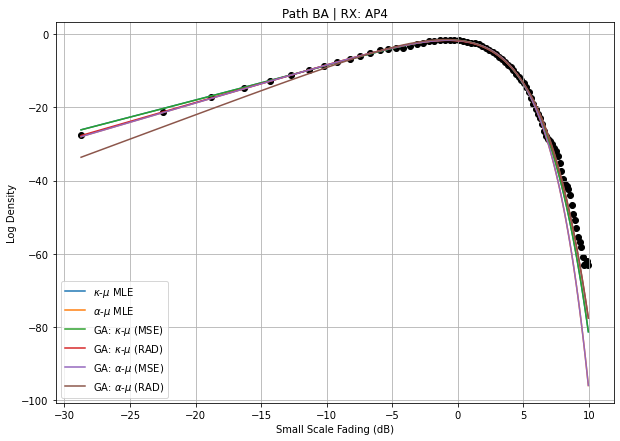

In [74]:
ku_BA_ap4_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap4[0], mle_ku_pathBA_ap4[1], mle_ku_pathBA_ap4[2]).astype(float)
au_BA_ap4_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap4[0], mle_au_pathBA_ap4[1], mle_au_pathBA_ap4[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_BA_ap4_pdf,\
     au_BA_ap4_pdf,\
     estParameters_pathBA_ap4['GA: KappaMu - MSE'],\
     estParameters_pathBA_ap4['GA: KappaMu - RAD'],\
     estParameters_pathBA_ap4['GA: AlphaMu - MSE'],\
     estParameters_pathBA_ap4['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [75]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap4 = computeAIC(data, n, K,\
                            mle_ku_pathBA_ap4,\
                            mle_au_pathBA_ap4,\
                            estParameters_pathBA_ap4['GA: KappaMu - MSE'],\
                            estParameters_pathBA_ap4['GA: KappaMu - RAD'],\
                            estParameters_pathBA_ap4['GA: AlphaMu - MSE'],\
                            estParameters_pathBA_ap4['GA: AlphaMu - RAD'])

Path: BA
RX: AP4


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),25153.451447
1,GA - KappaMu (Fitness = MSE),25173.931471
2,MLE - KappaMu,25174.263565
3,GA - AlphaMu (Fitness = RAD),25196.547270
4,GA - AlphaMu (Fitness = MSE),25232.041109
5,MLE - AlphaMu,25232.135044


### AP 5

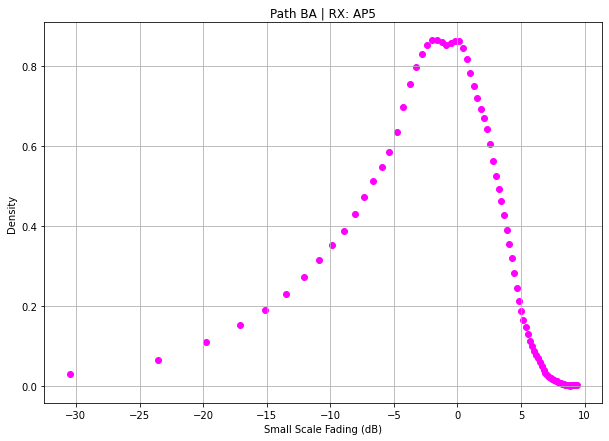

In [76]:
nAP = 'AP5'
estParameters_pathBA_ap5 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [77]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 5756)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 2246)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 4603)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 500)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP5

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 130.0594117641449 seconds.

Best Fitness: 5756.130821440194
Best Gen: 158
Kappa: 1.1074601049551902
Mu: 1.0592915322210152
Omega: 1.1814403982846253
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP5

Satisfactory Threshold reached!
Elapsed time is 30.623093128204346 seconds.

Best Fitness: 2247.0030565105017
Best Gen: 145
Kappa: 1.1507363030773676
Mu: 1.0341319813770882
Omega: 1.1888968921523289
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP5

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (

#### Estimated Parameters

In [78]:
mle_ku_pathBA_ap5 = [1.1126, 1.0574, 1.1813] # KappaMu MLE
mle_au_pathBA_ap5 = [2.6665, 0.85346, 1.1417] # AlphaMu MLE

estParameters_pathBA_ap5['MLE - KappaMu'] = mle_ku_pathBA_ap5
estParameters_pathBA_ap5['MLE - AlphaMu'] = mle_au_pathBA_ap5
estParameters_pathBA_ap5['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathBA_ap5['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathBA_ap5['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathBA_ap5['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathBA_ap5 = estParameters_pathBA_ap5.set_index(index)
estParameters_pathBA_ap5

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,1.1126,2.66650,1.107460,1.150736,2.671323,2.613444
mu,1.0574,0.85346,1.059292,1.034132,0.850734,0.848387
omega/r_hat,1.1813,1.14170,1.181440,1.188897,1.141791,1.130321


#### Plots

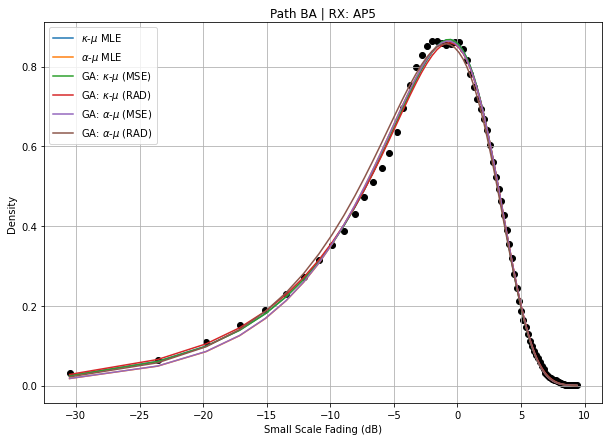

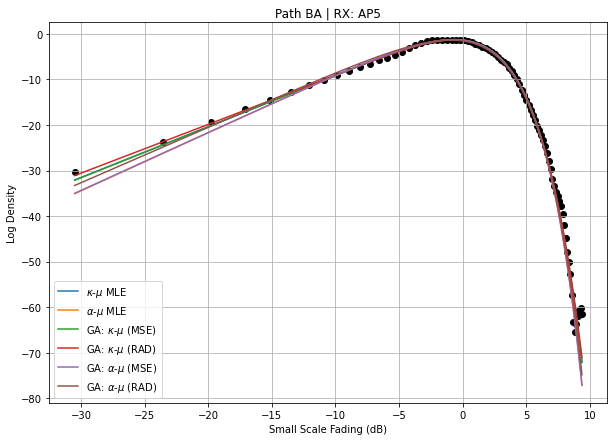

In [79]:
ku_BA_ap5_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap5[0], mle_ku_pathBA_ap5[1], mle_ku_pathBA_ap5[2]).astype(float)
au_BA_ap5_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap5[0], mle_au_pathBA_ap5[1], mle_au_pathBA_ap5[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_BA_ap5_pdf,\
     au_BA_ap5_pdf,\
     estParameters_pathBA_ap5['GA: KappaMu - MSE'],\
     estParameters_pathBA_ap5['GA: KappaMu - RAD'],\
     estParameters_pathBA_ap5['GA: AlphaMu - MSE'],\
     estParameters_pathBA_ap5['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [80]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap5 = computeAIC(data, n, K,\
                            mle_ku_pathBA_ap5,\
                            mle_au_pathBA_ap5,\
                            estParameters_pathBA_ap5['GA: KappaMu - MSE'],\
                            estParameters_pathBA_ap5['GA: KappaMu - RAD'],\
                            estParameters_pathBA_ap5['GA: AlphaMu - MSE'],\
                            estParameters_pathBA_ap5['GA: AlphaMu - RAD'])

Path: BA
RX: AP5


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = MSE),22977.622138
1,MLE - KappaMu,22977.786163
2,GA - KappaMu (Fitness = RAD),22980.878550
3,MLE - AlphaMu,22991.054595
4,GA - AlphaMu (Fitness = MSE),22991.174822
5,GA - AlphaMu (Fitness = RAD),22998.550843


### AP 6

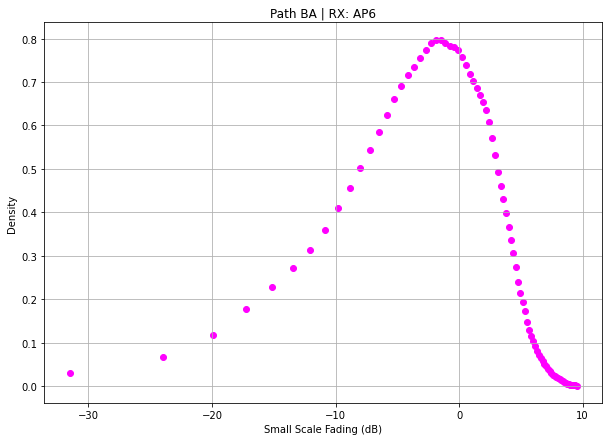

In [81]:
nAP = 'AP6'
estParameters_pathBA_ap6 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [82]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 11485)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 2017)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 12163)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 1204)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP6

Satisfactory Threshold reached!
Elapsed time is 9.132274150848389 seconds.

Best Fitness: 11486.83890657061
Best Gen: 38
Kappa: 0.7053818537711813
Mu: 1.0280805035517164
Omega: 1.2218406349363597
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP6

Satisfactory Threshold reached!
Elapsed time is 19.42273211479187 seconds.

Best Fitness: 2017.4539227313721
Best Gen: 89
Kappa: 0.575453055244804
Mu: 1.0571837310508987
Omega: 1.2264273356624162
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP6

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Poss

#### Estimated Parameters

In [83]:
mle_ku_pathBA_ap6 = [0.70449, 1.0284, 1.222] # KappaMu MLE
mle_au_pathBA_ap6 = [2.5138, 0.81093, 1.151] # AlphaMu MLE

estParameters_pathBA_ap6['MLE - KappaMu'] = mle_ku_pathBA_ap6
estParameters_pathBA_ap6['MLE - AlphaMu'] = mle_au_pathBA_ap6
estParameters_pathBA_ap6['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathBA_ap6['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathBA_ap6['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathBA_ap6['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathBA_ap6 = estParameters_pathBA_ap6.set_index(index)
estParameters_pathBA_ap6

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,0.70449,2.51380,0.705382,0.575453,2.511712,2.506492
mu,1.02840,0.81093,1.028081,1.057184,0.811995,0.801747
omega/r_hat,1.22200,1.15100,1.221841,1.226427,1.150852,1.154508


#### Plots

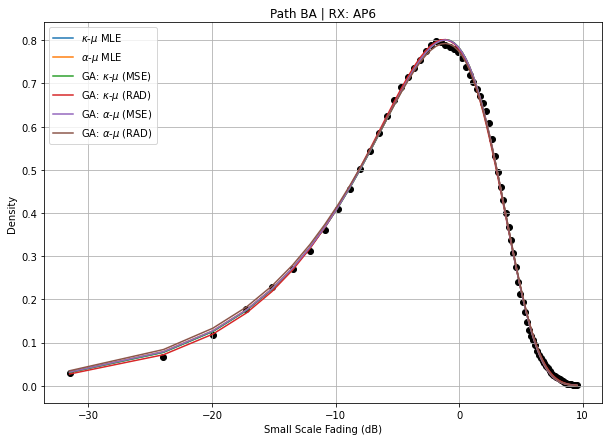

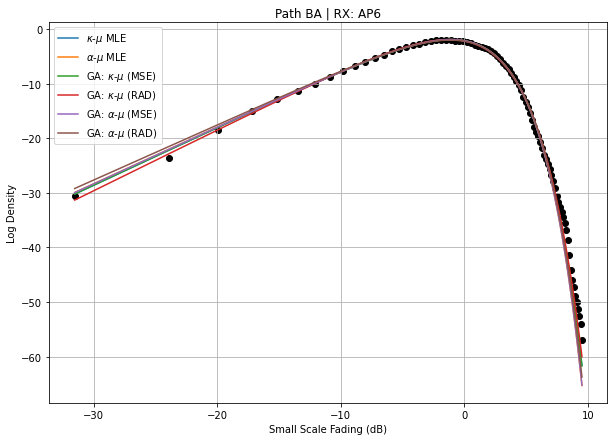

In [84]:
ku_BA_ap6_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap6[0], mle_ku_pathBA_ap6[1], mle_ku_pathBA_ap6[2]).astype(float)
au_BA_ap6_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap6[0], mle_au_pathBA_ap6[1], mle_au_pathBA_ap6[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_BA_ap6_pdf,\
     au_BA_ap6_pdf,\
     estParameters_pathBA_ap6['GA: KappaMu - MSE'],\
     estParameters_pathBA_ap6['GA: KappaMu - RAD'],\
     estParameters_pathBA_ap6['GA: AlphaMu - MSE'],\
     estParameters_pathBA_ap6['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [85]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap6 = computeAIC(data, n, K,\
                            mle_ku_pathBA_ap6,\
                            mle_au_pathBA_ap6,\
                            estParameters_pathBA_ap6['GA: KappaMu - MSE'],\
                            estParameters_pathBA_ap6['GA: KappaMu - RAD'],\
                            estParameters_pathBA_ap6['GA: AlphaMu - MSE'],\
                            estParameters_pathBA_ap6['GA: AlphaMu - RAD'])

Path: BA
RX: AP6


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),26090.229873
1,MLE - KappaMu,26098.551921
2,GA - KappaMu (Fitness = MSE),26098.681775
3,GA - AlphaMu (Fitness = MSE),26113.478814
4,MLE - AlphaMu,26113.897136
5,GA - AlphaMu (Fitness = RAD),26116.917169


### AP 7

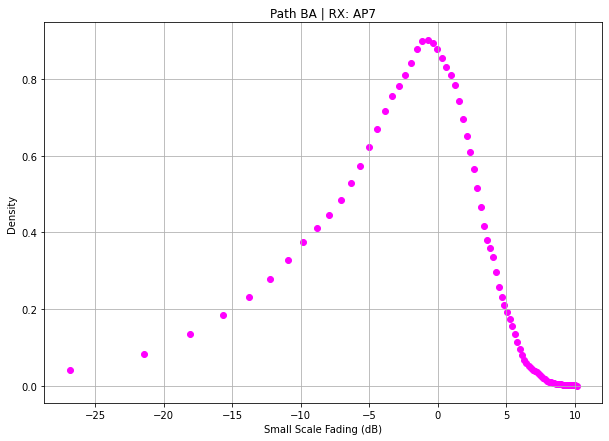

In [86]:
nAP = 'AP7'
estParameters_pathBA_ap7 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [87]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 3949)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 647)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 2609)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 255)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP7

Satisfactory Threshold reached!
Elapsed time is 37.64202308654785 seconds.

Best Fitness: 3949.322824303588
Best Gen: 149
Kappa: 1.3330666036387122
Mu: 0.9909078878565558
Omega: 1.154747102016265
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP7

Satisfactory Threshold reached!
Elapsed time is 29.69558548927307 seconds.

Best Fitness: 647.3448385078871
Best Gen: 130
Kappa: 0.7480950694702441
Mu: 1.108467249236135
Omega: 1.2006229882120742
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP7

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 74.29724502563477 seconds.

Best Fitness: [2609.0551894]
Best Gen: 153
Kappa: 2.66551827494952
Mu: 0.8510497476310966
R_hat: 1.1336912882922305
Genetic 

#### Estimated Parameters

In [88]:
mle_ku_pathBA_ap7 = [1.3334, 0.99134, 1.1553] # KappaMu MLE
mle_au_pathBA_ap7 = [2.6677, 0.85012, 1.1337] # AlphaMu MLE

estParameters_pathBA_ap7['MLE - KappaMu'] = mle_ku_pathBA_ap7
estParameters_pathBA_ap7['MLE - AlphaMu'] = mle_au_pathBA_ap7
estParameters_pathBA_ap7['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathBA_ap7['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathBA_ap7['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathBA_ap7['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathBA_ap7 = estParameters_pathBA_ap7.set_index(index)
estParameters_pathBA_ap7

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,1.33340,2.66770,1.333067,0.748095,2.665518,1.893882
mu,0.99134,0.85012,0.990908,1.108467,0.851050,1.306253
omega/r_hat,1.15530,1.13370,1.154747,1.200623,1.133691,1.080765


#### Plots

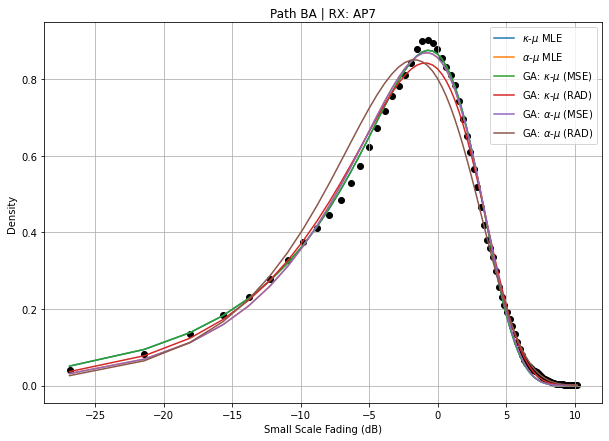

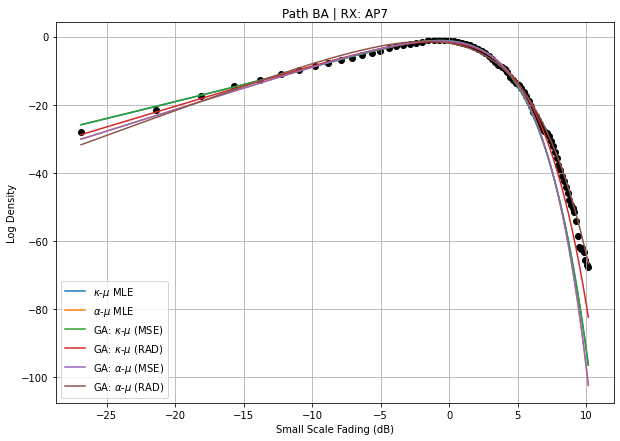

In [89]:
ku_BA_ap7_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap7[0], mle_ku_pathBA_ap7[1], mle_ku_pathBA_ap7[2]).astype(float)
au_BA_ap7_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap7[0], mle_au_pathBA_ap7[1], mle_au_pathBA_ap7[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_BA_ap7_pdf,\
     au_BA_ap7_pdf,\
     estParameters_pathBA_ap7['GA: KappaMu - MSE'],\
     estParameters_pathBA_ap7['GA: KappaMu - RAD'],\
     estParameters_pathBA_ap7['GA: AlphaMu - MSE'],\
     estParameters_pathBA_ap7['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [90]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap7 = computeAIC(data, n, K,\
                            mle_ku_pathBA_ap7,\
                            mle_au_pathBA_ap7,\
                            estParameters_pathBA_ap7['GA: KappaMu - MSE'],\
                            estParameters_pathBA_ap7['GA: KappaMu - RAD'],\
                            estParameters_pathBA_ap7['GA: AlphaMu - MSE'],\
                            estParameters_pathBA_ap7['GA: AlphaMu - RAD'])

Path: BA
RX: AP7


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),25056.103852
1,GA - AlphaMu (Fitness = RAD),25161.387976
2,GA - AlphaMu (Fitness = MSE),25188.814319
3,MLE - KappaMu,25190.014422
4,MLE - AlphaMu,25190.415816
5,GA - KappaMu (Fitness = MSE),25190.783588


### AP 8

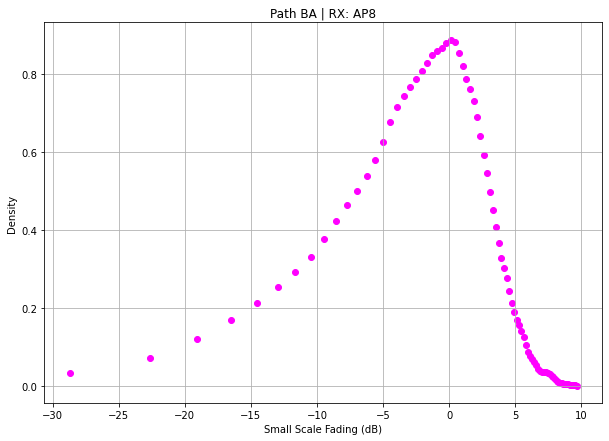

In [91]:
nAP = 'AP8'
estParameters_pathBA_ap8 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [92]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 5071)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 301)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 2991)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 68)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP8

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 86.47099566459656 seconds.

Best Fitness: 5071.022389209509
Best Gen: 143
Kappa: 1.5643209652301966
Mu: 0.9393023179878959
Omega: 1.1614286572911796
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP8

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 47.55274176597595 seconds.

Best Fitness: 413.4998248291427
Best Gen: 8
Kappa: 0.9649727153786649
Mu: 1.0472282669408872
Omega: 1.1811041008119583
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP8

Satisfactory Threshold reached!
Elapsed time is 15.33553409576416 seconds.

Best Fitness: [2991.02008633]
Best Gen: 73
K

#### Estimated Parameters

In [93]:
mle_ku_pathBA_ap8 = [1.5666, 0.9388, 1.1612] # KappaMu MLE
mle_au_pathBA_ap8 = [2.9771, 0.72971, 1.1493] # AlphaMu MLE

estParameters_pathBA_ap8['MLE - KappaMu'] = mle_ku_pathBA_ap8
estParameters_pathBA_ap8['MLE - AlphaMu'] = mle_au_pathBA_ap8
estParameters_pathBA_ap8['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathBA_ap8['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathBA_ap8['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathBA_ap8['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathBA_ap8 = estParameters_pathBA_ap8.set_index(index)
estParameters_pathBA_ap8

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,1.5666,2.97710,1.564321,0.964973,2.975260,1.346747
mu,0.9388,0.72971,0.939302,1.047228,0.731324,2.272244
omega/r_hat,1.1612,1.14930,1.161429,1.181104,1.149109,1.071059


#### Plots

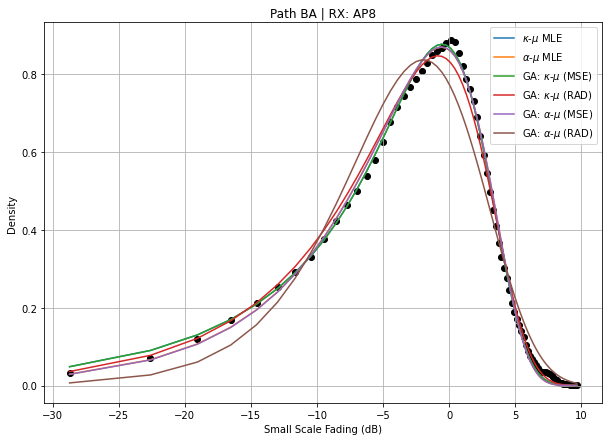

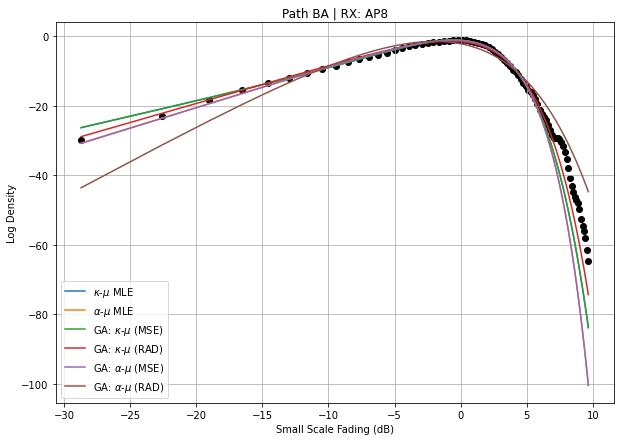

In [94]:
ku_BA_ap8_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap8[0], mle_ku_pathBA_ap8[1], mle_ku_pathBA_ap8[2]).astype(float)
au_BA_ap8_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap8[0], mle_au_pathBA_ap8[1], mle_au_pathBA_ap8[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_BA_ap8_pdf,\
     au_BA_ap8_pdf,\
     estParameters_pathBA_ap8['GA: KappaMu - MSE'],\
     estParameters_pathBA_ap8['GA: KappaMu - RAD'],\
     estParameters_pathBA_ap8['GA: AlphaMu - MSE'],\
     estParameters_pathBA_ap8['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [95]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap8 = computeAIC(data, n, K,\
                            mle_ku_pathBA_ap8,\
                            mle_au_pathBA_ap8,\
                            estParameters_pathBA_ap8['GA: KappaMu - MSE'],\
                            estParameters_pathBA_ap8['GA: KappaMu - RAD'],\
                            estParameters_pathBA_ap8['GA: AlphaMu - MSE'],\
                            estParameters_pathBA_ap8['GA: AlphaMu - RAD'])

Path: BA
RX: AP8


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),24003.564606
1,GA - KappaMu (Fitness = MSE),24126.173779
2,MLE - KappaMu,24127.107363
3,MLE - AlphaMu,24290.619403
4,GA - AlphaMu (Fitness = MSE),24292.134576
5,GA - AlphaMu (Fitness = RAD),24602.050871


### AP 9

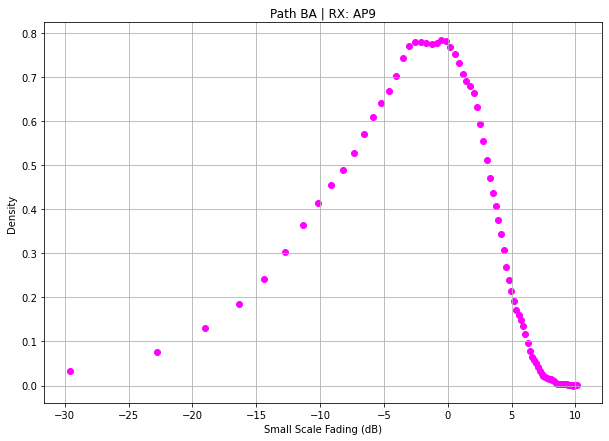

In [96]:
nAP = 'AP9'
estParameters_pathBA_ap9 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [97]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 11246)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 2672)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 11910)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 300)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP9

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 83.27993154525757 seconds.

Best Fitness: 11246.284056430044
Best Gen: 114
Kappa: 0.7775645665685121
Mu: 1.0072528144446835
Omega: 1.2306663676741354
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP9

Satisfactory Threshold reached!
Elapsed time is 21.415175676345825 seconds.

Best Fitness: 2672.2329695297385
Best Gen: 91
Kappa: 0.6970618897880085
Mu: 1.0366768648223956
Omega: 1.2291700016297318
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP9

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (

#### Estimated Parameters

In [98]:
mle_ku_pathBA_ap9 = [0.77596, 1.0077, 1.2309] # KappaMu MLE
mle_au_pathBA_ap9 = [2.5837, 0.77709, 1.1606] # AlphaMu MLE

estParameters_pathBA_ap9['MLE - KappaMu'] = mle_ku_pathBA_ap9
estParameters_pathBA_ap9['MLE - AlphaMu'] = mle_au_pathBA_ap9
estParameters_pathBA_ap9['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathBA_ap9['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathBA_ap9['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathBA_ap9['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathBA_ap9 = estParameters_pathBA_ap9.set_index(index)
estParameters_pathBA_ap9

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,0.77596,2.58370,0.777565,0.697062,2.582223,2.841702
mu,1.00770,0.77709,1.007253,1.036677,0.777793,0.682053
omega/r_hat,1.23090,1.16060,1.230666,1.229170,1.160747,1.219624


#### Plots

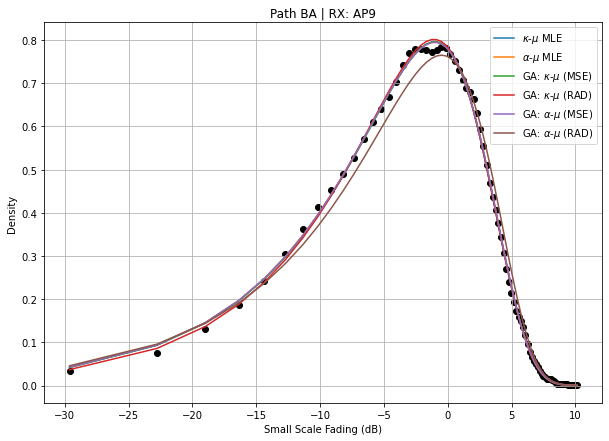

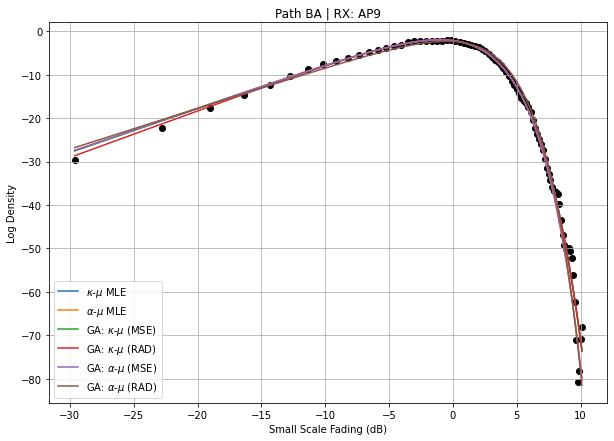

In [99]:
ku_BA_ap9_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap9[0], mle_ku_pathBA_ap9[1], mle_ku_pathBA_ap9[2]).astype(float)
au_BA_ap9_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap9[0], mle_au_pathBA_ap9[1], mle_au_pathBA_ap9[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_BA_ap9_pdf,\
     au_BA_ap9_pdf,\
     estParameters_pathBA_ap9['GA: KappaMu - MSE'],\
     estParameters_pathBA_ap9['GA: KappaMu - RAD'],\
     estParameters_pathBA_ap9['GA: AlphaMu - MSE'],\
     estParameters_pathBA_ap9['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [100]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap9 = computeAIC(data, n, K,\
                            mle_ku_pathBA_ap9,\
                            mle_au_pathBA_ap9,\
                            estParameters_pathBA_ap9['GA: KappaMu - MSE'],\
                            estParameters_pathBA_ap9['GA: KappaMu - RAD'],\
                            estParameters_pathBA_ap9['GA: AlphaMu - MSE'],\
                            estParameters_pathBA_ap9['GA: AlphaMu - RAD'])

Path: BA
RX: AP9


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),26020.871805
1,MLE - KappaMu,26031.113540
2,GA - KappaMu (Fitness = MSE),26031.249282
3,GA - AlphaMu (Fitness = MSE),26036.791689
4,MLE - AlphaMu,26037.119766
5,GA - AlphaMu (Fitness = RAD),26170.933526
